In [1]:
%pip install seaborn

import sys
import os
sys.path.append(os.path.abspath('../src'))

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
import joblib

from utils import load_data, preprocess_data, custom_scorer, train_and_evaluate_model, plot_feature_importance, plot_confusion_matrix

In [3]:
# Load data for each feature set
feature_sets = ['../Data/Features/Random_Forest.csv', '../Data/Features/RF_MI_Union.csv', 
                '../Data/Features/RF_MI_Intersection.csv',
                '../Data/Features/NSCLC_biomarkers_de_analysis.csv', 
                '../Data/Features/NSCLC_biomarkers_50_de_analysis.csv',
                '../Data/Features/RF_MI_DE_Union.csv',
                '../Data/Features/MI_DE_Intersection.csv',
                '../Data/Features/RF_DE_Intersection.csv',
               ]

expression_path = '../Data/Processed/NSCLC_expression_model_training.csv'
labels_path = '../Data/Processed/NSCLC_labels_model_training.csv'

Processing feature set: ../Data/Features/Random_Forest.csv
Initial model performance:
Accuracy: 0.9685
AUC-ROC: 0.9919
Cross-validation scores: 0.9515 (+/- 0.0325)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.99      0.94      0.96        97
           2       1.00      1.00      1.00        17

    accuracy                           0.97       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.97      0.97      0.97       222



/anaconda/envs/jupyter_env/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.7, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}

Tuned model performance:
Accuracy: 0.9730
AUC-ROC: 0.9946
Cross-validation scores: 0.9504 (+/- 0.0272)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.98      0.96      0.97        97
           2       1.00      1.00      1.00        17

    accuracy                           0.97       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.97      0.97      0.97       222



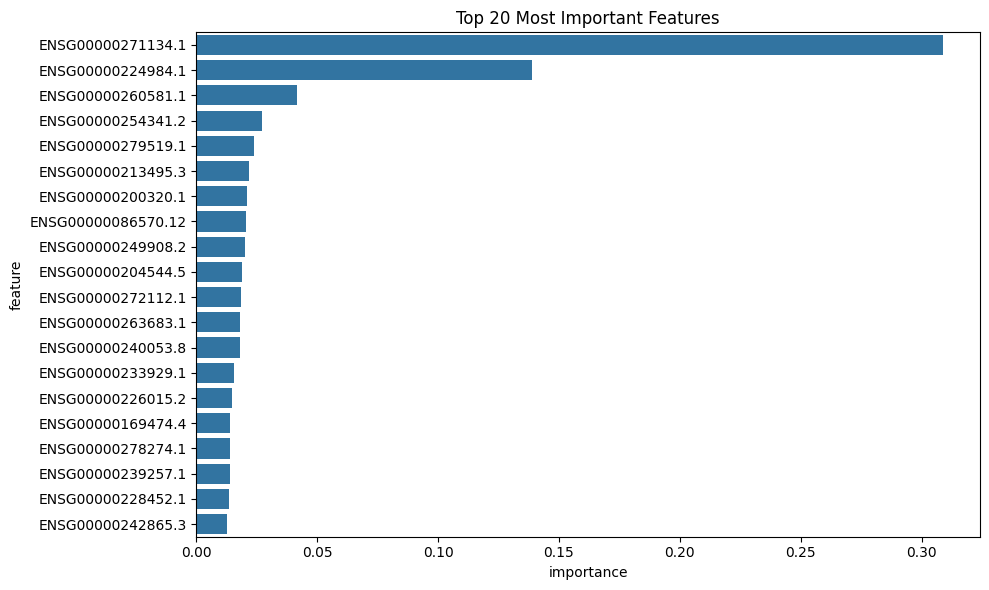

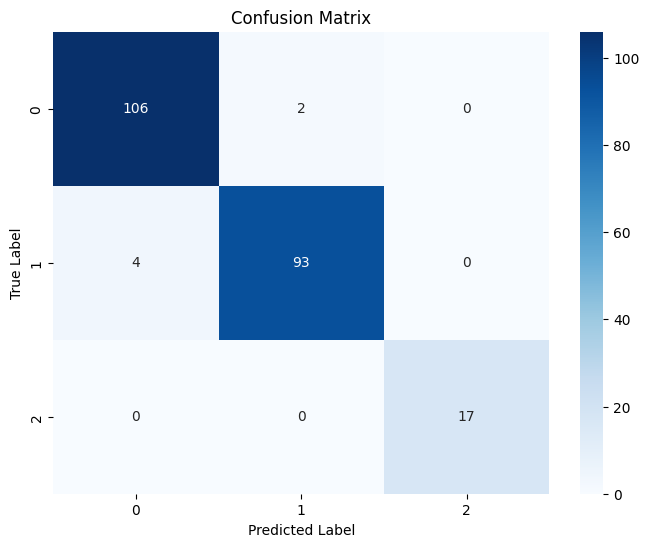

Processing feature set: ../Data/Features/RF_MI_Union.csv
Initial model performance:
Accuracy: 0.9730
AUC-ROC: 0.9920
Cross-validation scores: 0.9504 (+/- 0.0230)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.99      0.95      0.97        97
           2       1.00      1.00      1.00        17

    accuracy                           0.97       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.97      0.97      0.97       222



/anaconda/envs/jupyter_env/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 40, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}

Tuned model performance:
Accuracy: 0.9640
AUC-ROC: 0.9981
Cross-validation scores: 0.9538 (+/- 0.0354)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.99      0.93      0.96        97
           2       1.00      1.00      1.00        17

    accuracy                           0.96       222
   macro avg       0.98      0.97      0.97       222
weighted avg       0.97      0.96      0.96       222



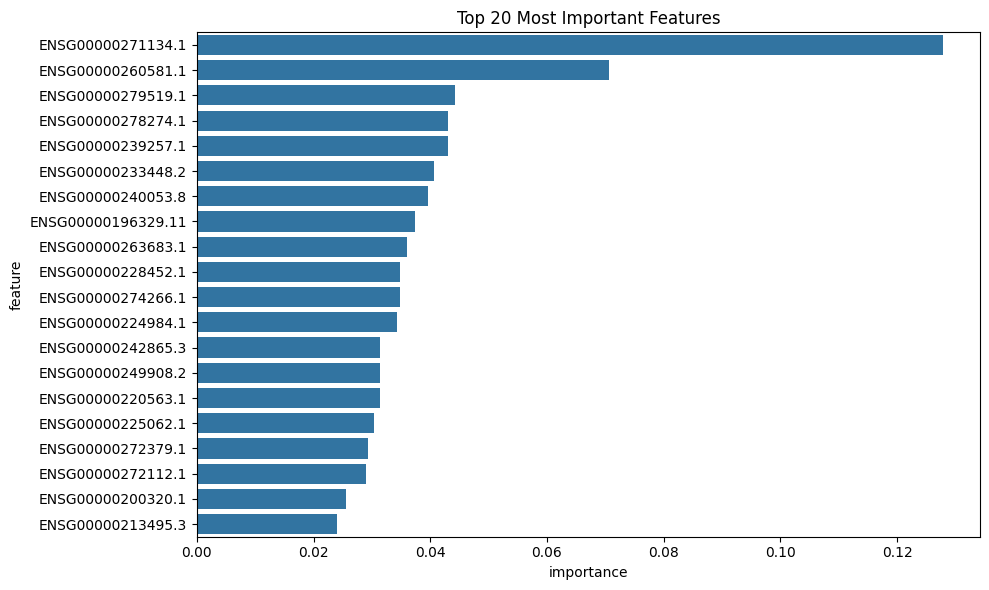

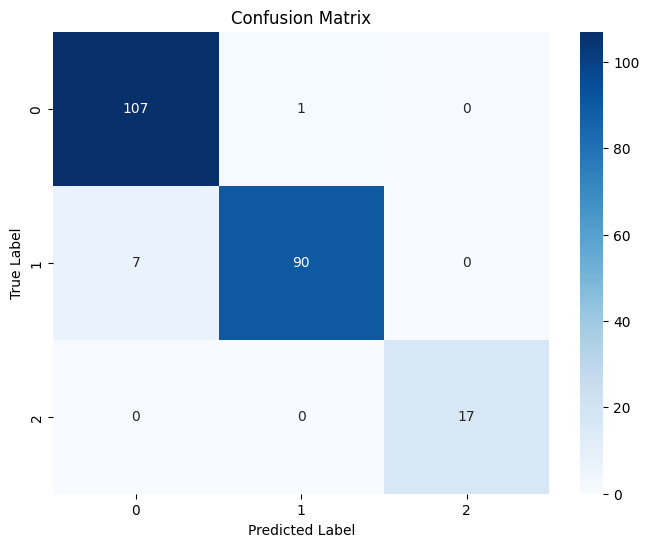

Processing feature set: ../Data/Features/RF_MI_Intersection.csv
Initial model performance:
Accuracy: 0.9640
AUC-ROC: 0.9917
Cross-validation scores: 0.9459 (+/- 0.0347)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.99      0.94      0.96        97
           2       1.00      0.94      0.97        17

    accuracy                           0.96       222
   macro avg       0.98      0.96      0.97       222
weighted avg       0.97      0.96      0.96       222

Best parameters found: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': False}

Tuned model performance:
Accuracy: 0.9595
AUC-ROC: 0.9936
Cross-validation scores: 0.9481 (+/- 0.0352)

Classification Report:
               precision    recall  f1-score   support

           0       0.94 

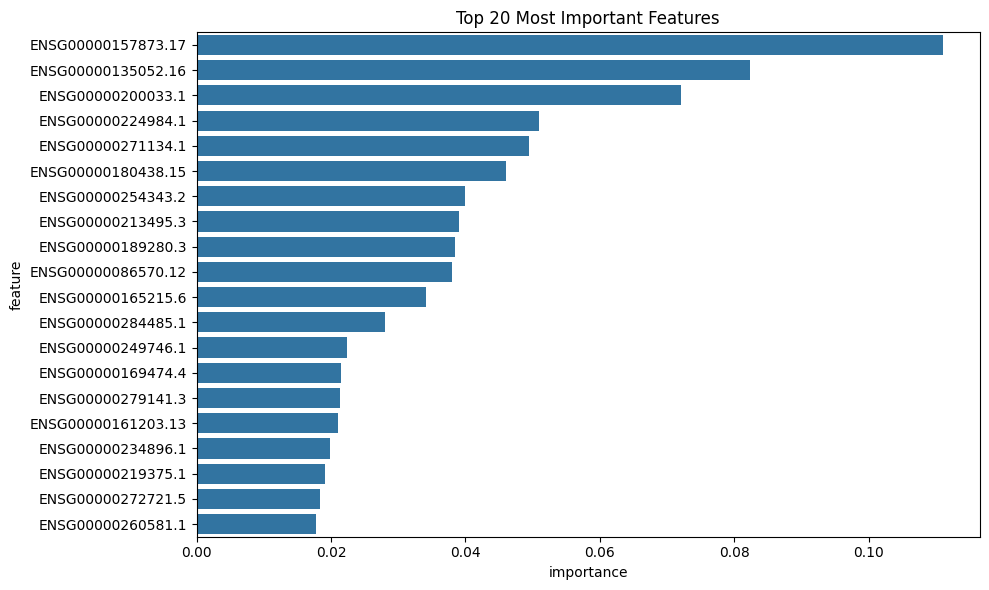

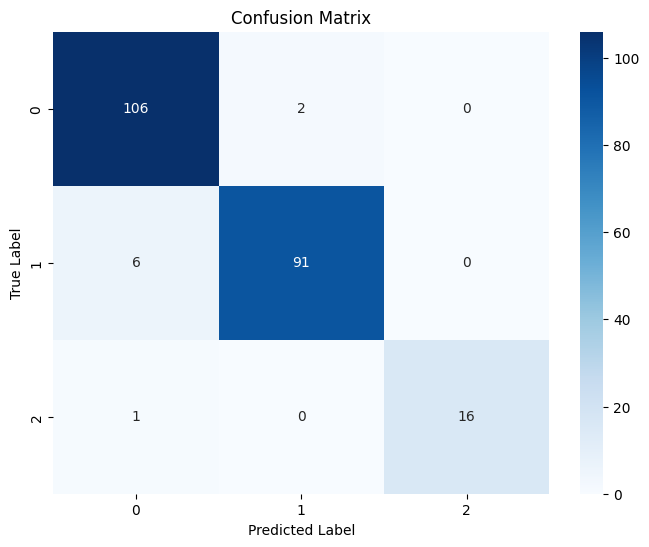

Processing feature set: ../Data/Features/NSCLC_biomarkers_de_analysis.csv
Initial model performance:
Accuracy: 0.8514
AUC-ROC: 0.9511
Cross-validation scores: 0.8838 (+/- 0.0287)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       108
           1       0.86      0.79      0.82        97
           2       1.00      1.00      1.00        17

    accuracy                           0.85       222
   macro avg       0.89      0.89      0.89       222
weighted avg       0.85      0.85      0.85       222



/anaconda/envs/jupyter_env/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}

Tuned model performance:
Accuracy: 0.8423
AUC-ROC: 0.9509
Cross-validation scores: 0.8816 (+/- 0.0400)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       108
           1       0.83      0.80      0.82        97
           2       1.00      1.00      1.00        17

    accuracy                           0.84       222
   macro avg       0.89      0.89      0.89       222
weighted avg       0.84      0.84      0.84       222



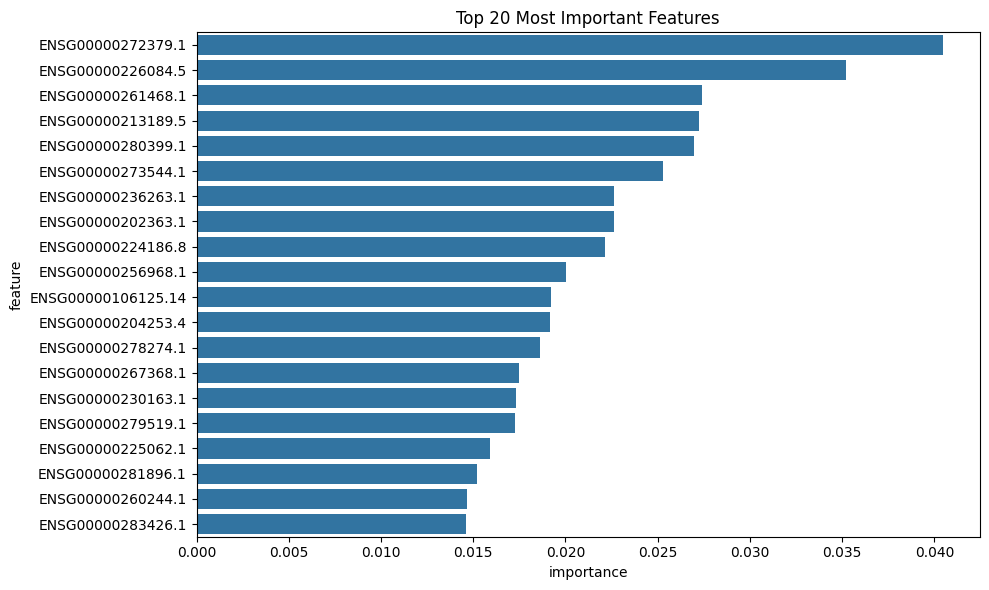

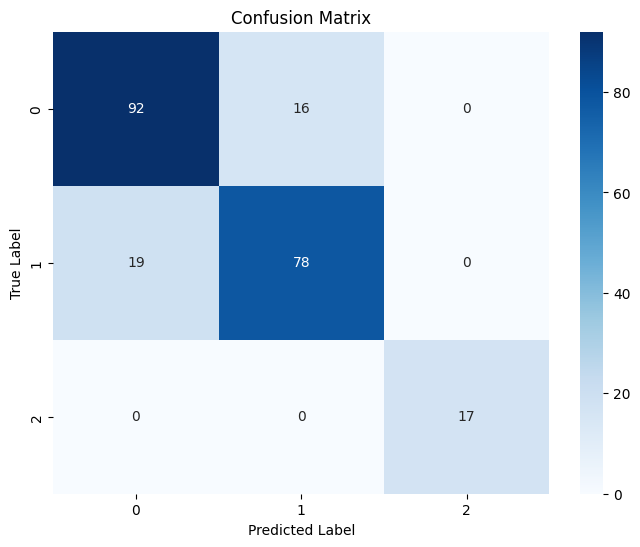

Processing feature set: ../Data/Features/NSCLC_biomarkers_50_de_analysis.csv
Initial model performance:
Accuracy: 0.8153
AUC-ROC: 0.9357
Cross-validation scores: 0.8410 (+/- 0.0615)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       108
           1       0.82      0.74      0.78        97
           2       1.00      1.00      1.00        17

    accuracy                           0.82       222
   macro avg       0.87      0.86      0.87       222
weighted avg       0.82      0.82      0.81       222



/anaconda/envs/jupyter_env/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': False}

Tuned model performance:
Accuracy: 0.8153
AUC-ROC: 0.9383
Cross-validation scores: 0.8466 (+/- 0.0563)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       108
           1       0.81      0.75      0.78        97
           2       1.00      1.00      1.00        17

    accuracy                           0.82       222
   macro avg       0.87      0.87      0.87       222
weighted avg       0.82      0.82      0.81       222



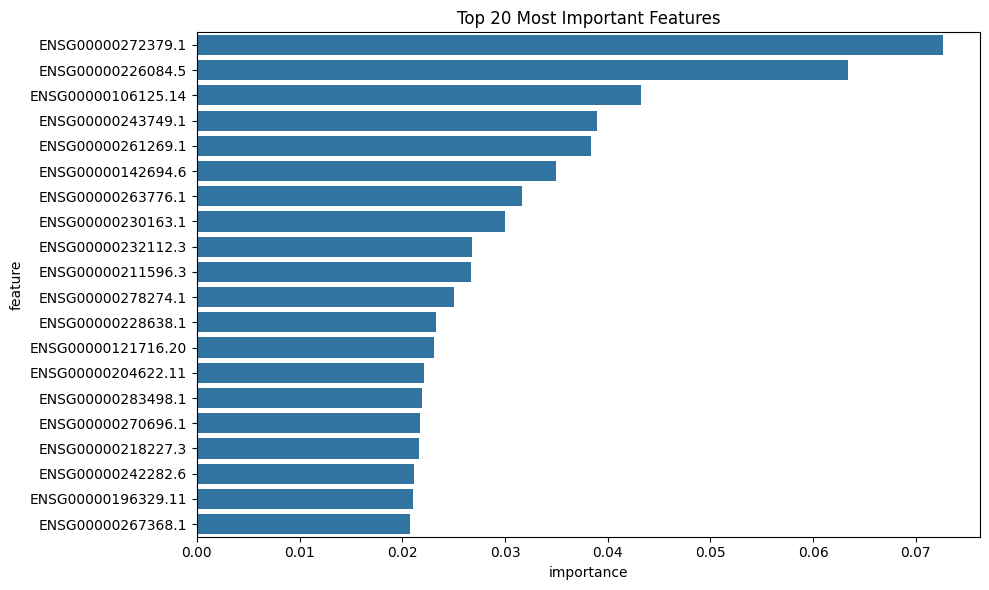

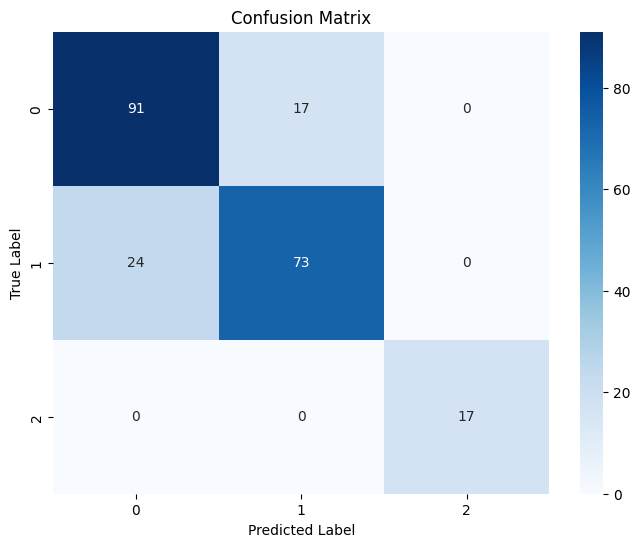

Processing feature set: ../Data/Features/RF_MI_DE_Union.csv
Initial model performance:
Accuracy: 0.8153
AUC-ROC: 0.9375
Cross-validation scores: 0.8387 (+/- 0.0450)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       108
           1       0.81      0.75      0.78        97
           2       1.00      1.00      1.00        17

    accuracy                           0.82       222
   macro avg       0.87      0.87      0.87       222
weighted avg       0.82      0.82      0.81       222

Best parameters found: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': True}

Tuned model performance:
Accuracy: 0.8288
AUC-ROC: 0.9361
Cross-validation scores: 0.8500 (+/- 0.0344)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84 

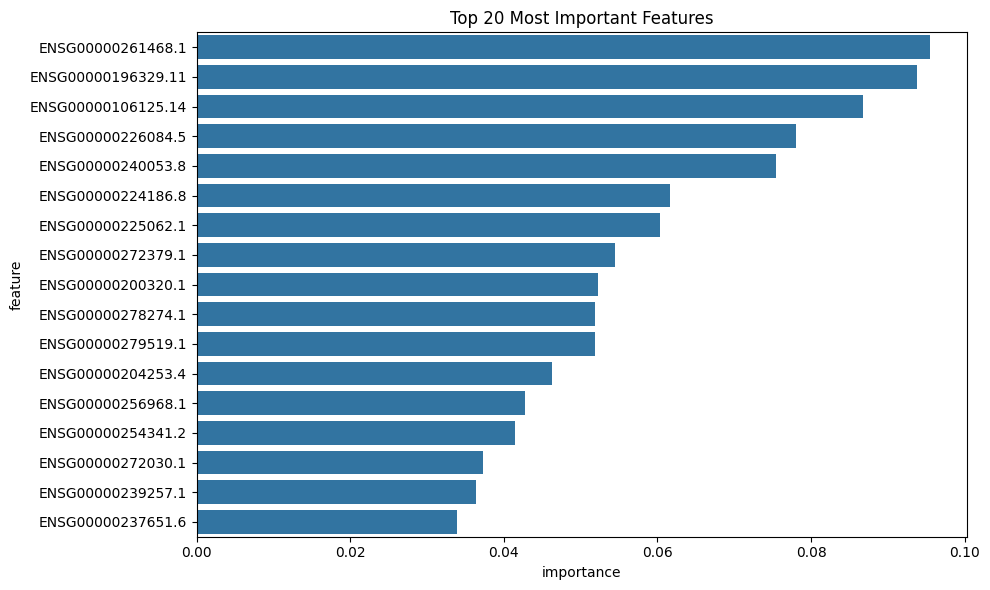

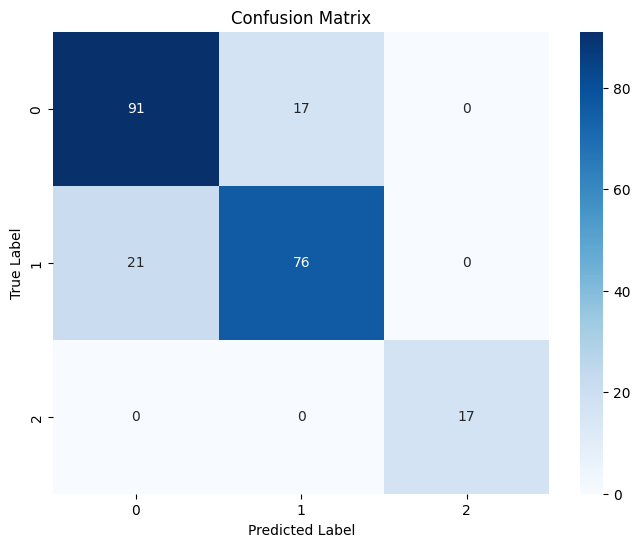

Processing feature set: ../Data/Features/MI_DE_Intersection.csv
Initial model performance:
Accuracy: 0.8153
AUC-ROC: 0.9351
Cross-validation scores: 0.8444 (+/- 0.0493)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       108
           1       0.83      0.72      0.77        97
           2       1.00      1.00      1.00        17

    accuracy                           0.82       222
   macro avg       0.87      0.86      0.86       222
weighted avg       0.82      0.82      0.81       222



/anaconda/envs/jupyter_env/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': True}

Tuned model performance:
Accuracy: 0.8243
AUC-ROC: 0.9431
Cross-validation scores: 0.8545 (+/- 0.0365)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       108
           1       0.82      0.77      0.79        97
           2       1.00      1.00      1.00        17

    accuracy                           0.82       222
   macro avg       0.87      0.87      0.87       222
weighted avg       0.82      0.82      0.82       222



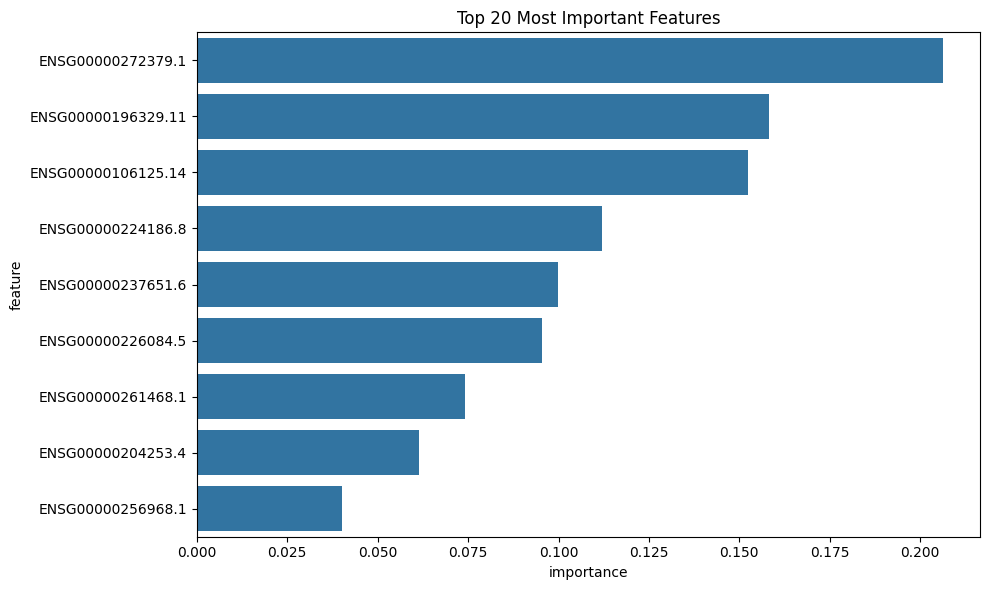

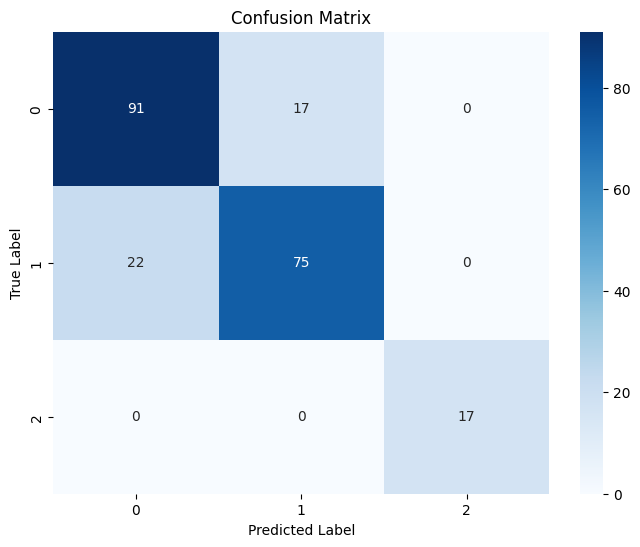

Processing feature set: ../Data/Features/RF_DE_Intersection.csv
Initial model performance:
Accuracy: 0.5586
AUC-ROC: 0.7385
Cross-validation scores: 0.5490 (+/- 0.0268)

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.47      0.51       108
           1       0.50      0.58      0.53        97
           2       1.00      1.00      1.00        17

    accuracy                           0.56       222
   macro avg       0.68      0.68      0.68       222
weighted avg       0.56      0.56      0.56       222



/anaconda/envs/jupyter_env/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': True}

Tuned model performance:
Accuracy: 0.5991
AUC-ROC: 0.7796
Cross-validation scores: 0.5863 (+/- 0.0358)

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.46      0.53       108
           1       0.53      0.68      0.60        97
           2       1.00      1.00      1.00        17

    accuracy                           0.60       222
   macro avg       0.72      0.71      0.71       222
weighted avg       0.61      0.60      0.59       222



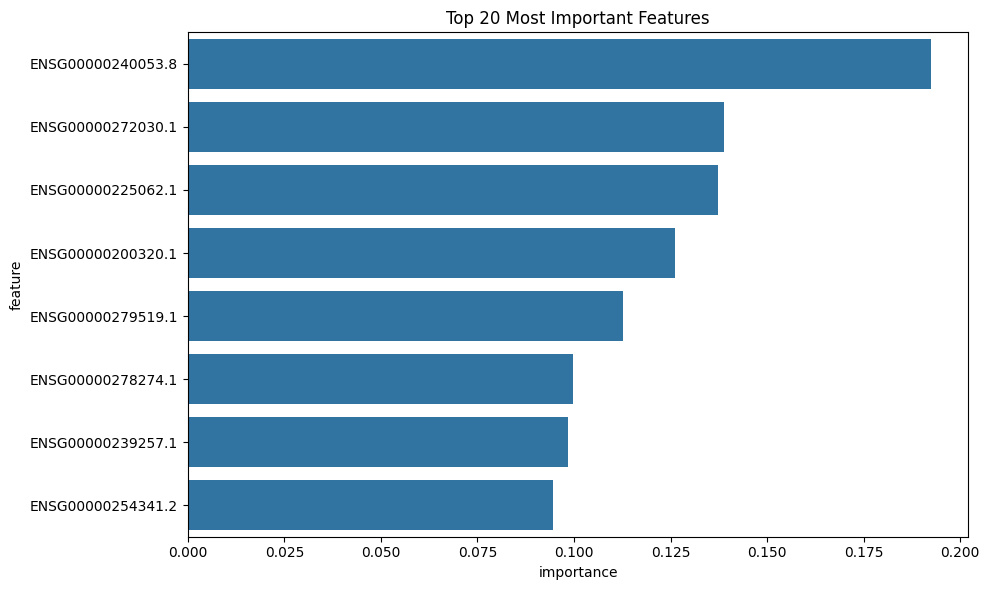

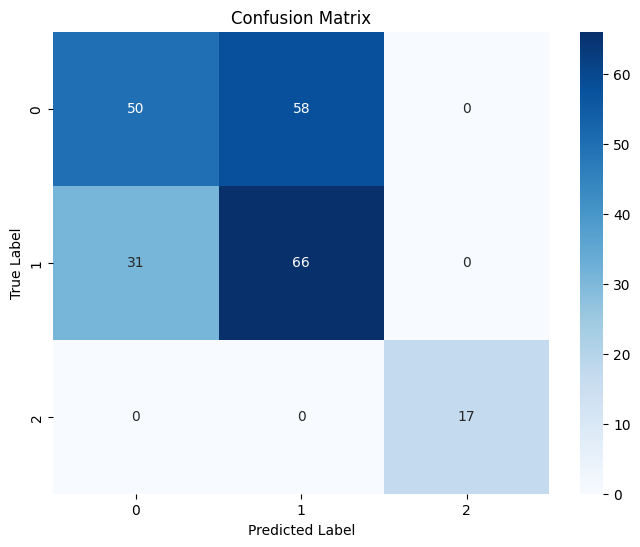

In [4]:
for feature_set in feature_sets:
    print(f"Processing feature set: {feature_set}")
    
    # Load and preprocess data
    X, y = load_data(expression_path, labels_path, feature_set)
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Initialize and train Random Forest model
    rf = RandomForestClassifier(random_state=42)
    rf, initial_metrics = train_and_evaluate_model(rf, X_train, X_test, y_train, y_test)
    
    print("Initial model performance:")
    print(f"Accuracy: {initial_metrics['accuracy']:.4f}")
    print(f"AUC-ROC: {initial_metrics['auc_roc']:.4f}")
    print(f"Cross-validation scores: {initial_metrics['cv_scores'].mean():.4f} (+/- {initial_metrics['cv_scores'].std() * 2:.4f})")
    print("\nClassification Report:\n", initial_metrics['classification_report'])
    
    # Hyperparameter tuning
    param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 750, 1000],
    'max_depth': [5, 10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5, 0.7, 1.0],  # Removed 'auto'
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'criterion': ['gini', 'entropy']
    }
    
    rf_random = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=300, 
    cv=3, 
    verbose=0, 
    random_state=42, 
    n_jobs=-1,
    error_score='raise')
    
    rf_random.fit(X_train, y_train)
    
    print("Best parameters found:", rf_random.best_params_)
    
    # Train and evaluate tuned model
    best_rf = rf_random.best_estimator_
    best_rf, tuned_metrics = train_and_evaluate_model(best_rf, X_train, X_test, y_train, y_test)
    
    print("\nTuned model performance:")
    print(f"Accuracy: {tuned_metrics['accuracy']:.4f}")
    print(f"AUC-ROC: {tuned_metrics['auc_roc']:.4f}")
    print(f"Cross-validation scores: {tuned_metrics['cv_scores'].mean():.4f} (+/- {tuned_metrics['cv_scores'].std() * 2:.4f})")
    print("\nClassification Report:\n", tuned_metrics['classification_report'])
    
    # Plot feature importance
    plot_feature_importance(best_rf, X.columns)
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, best_rf.predict(X_test))
    
#     # Save the model and important features
#     joblib.dump(best_rf, f'best_rf_model_{feature_set}.joblib')
#     pd.DataFrame({
#         'feature': X.columns,
#         'importance': best_rf.feature_importances_
#     }).sort_values('importance', ascending=False).to_csv(f'feature_importance_{feature_set}.csv', index=False)
    
#     print(f"Model and feature importance for {feature_set} have been saved.")
#     print("\n" + "="*50 + "\n")

Processing feature set: ../Data/Features/Random_Forest.csv
Initial model performance:
Accuracy: 0.9685
AUC-ROC: 0.9973
Cross-validation scores: 0.9527 (+/- 0.0253)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.97      0.96      0.96       100
           2       1.00      1.00      1.00        14

    accuracy                           0.97       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.97      0.97      0.97       222

Best parameters found: {'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 0.42982190612457394, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 500}

Tuned model performance:
Accuracy: 0.9595
AUC-ROC: 0.9980
Cross-validation scores: 0.9549 (+/- 0.0237)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95 

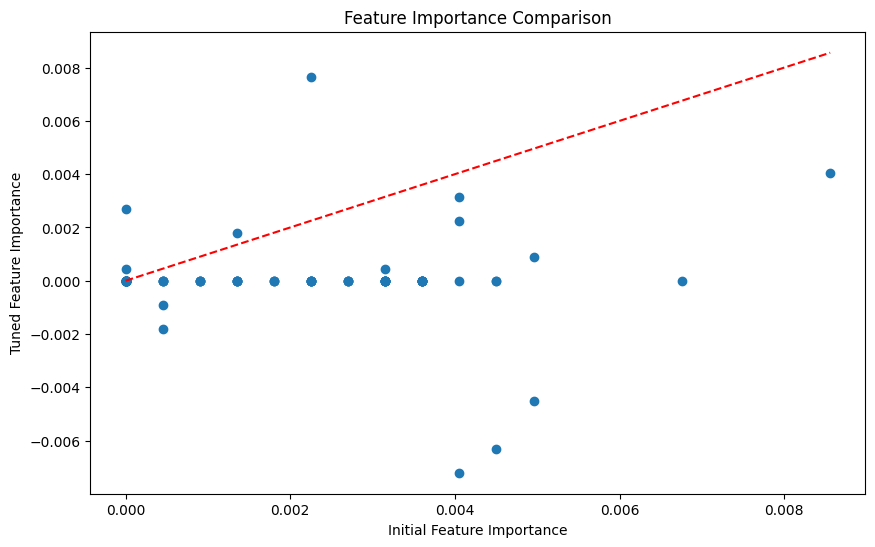

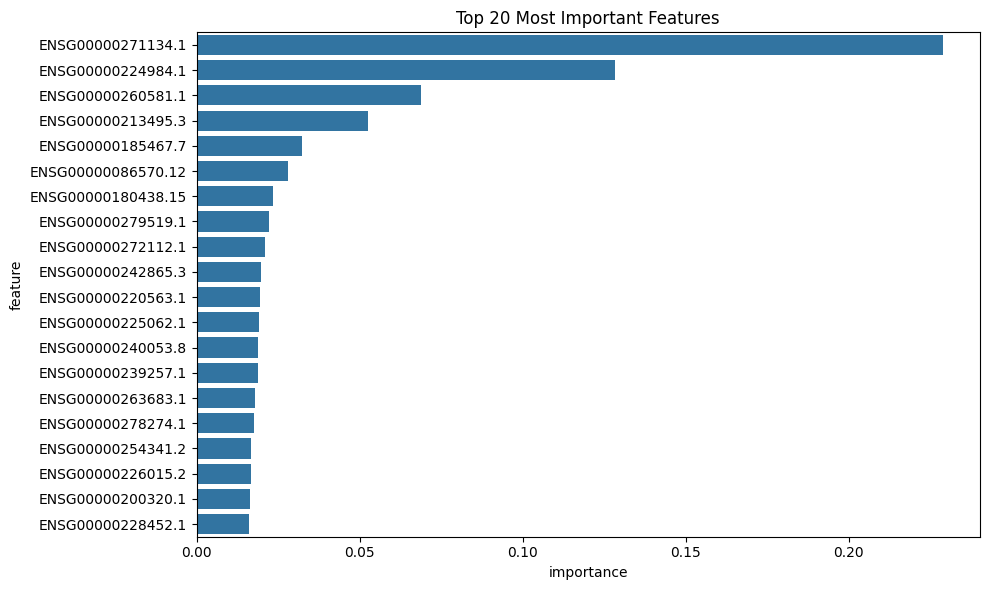

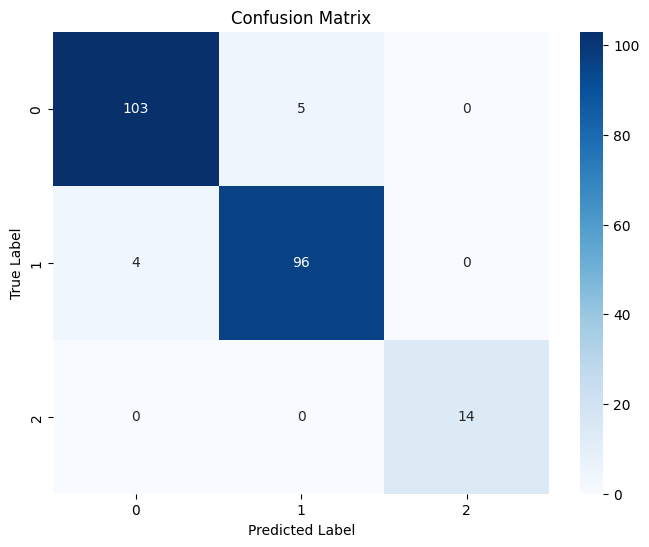

Processing feature set: ../Data/Features/RF_MI_Union.csv
Initial model performance:
Accuracy: 0.9730
AUC-ROC: 0.9974
Cross-validation scores: 0.9538 (+/- 0.0230)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.98      0.96      0.97       100
           2       1.00      1.00      1.00        14

    accuracy                           0.97       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.97      0.97      0.97       222

Best parameters found: {'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.45698644175882674, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 616}

Tuned model performance:
Accuracy: 0.9730
AUC-ROC: 0.9990
Cross-validation scores: 0.9583 (+/- 0.0209)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96   

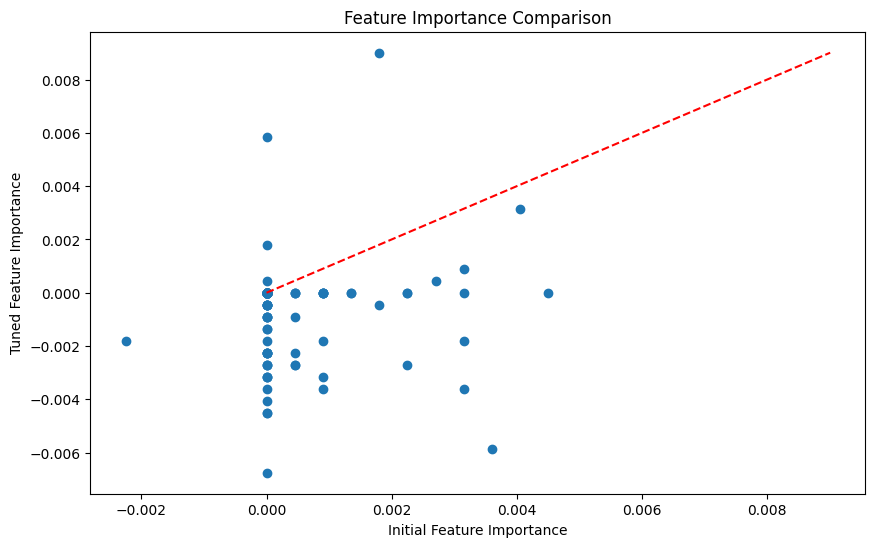

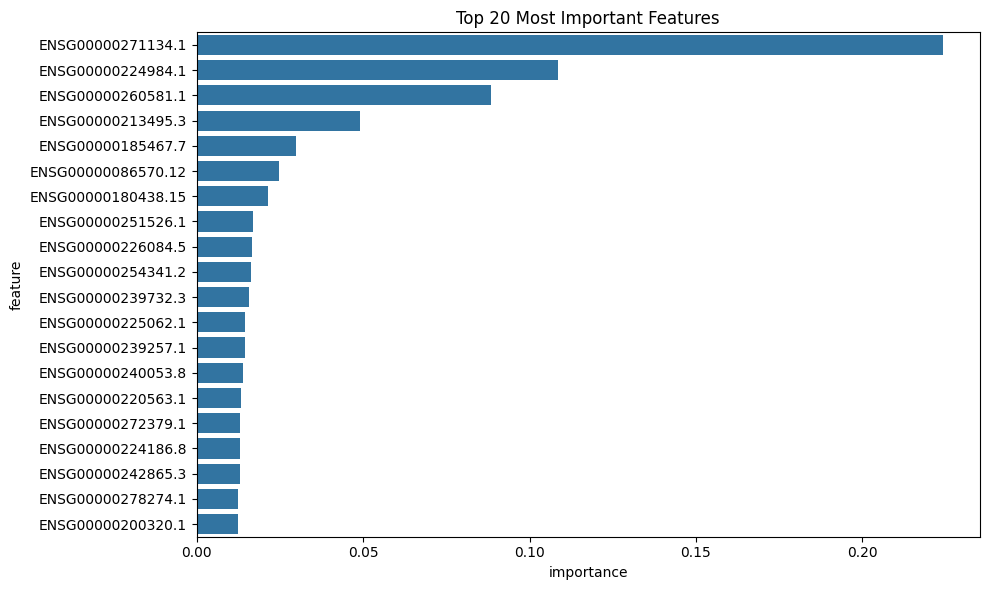

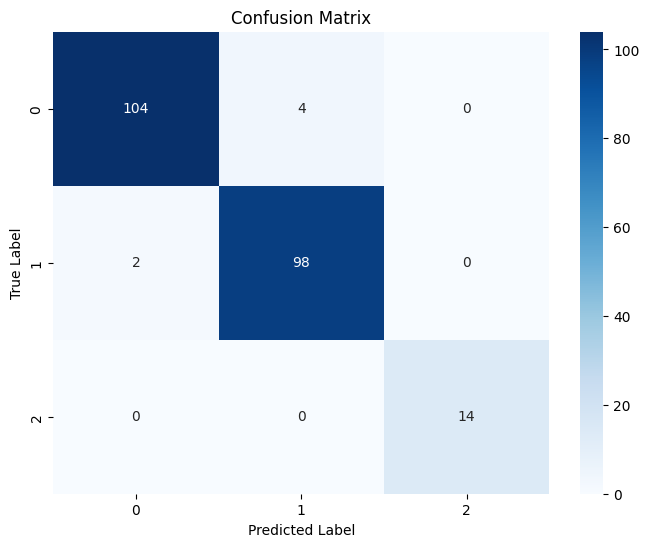

Processing feature set: ../Data/Features/RF_MI_Intersection.csv
Initial model performance:
Accuracy: 0.9730
AUC-ROC: 0.9969
Cross-validation scores: 0.9481 (+/- 0.0289)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.99      0.95      0.97       100
           2       1.00      1.00      1.00        14

    accuracy                           0.97       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.97      0.97      0.97       222

Best parameters found: {'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.2693090437513852, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 797}

Tuned model performance:
Accuracy: 0.9640
AUC-ROC: 0.9977
Cross-validation scores: 0.9481 (+/- 0.0218)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0

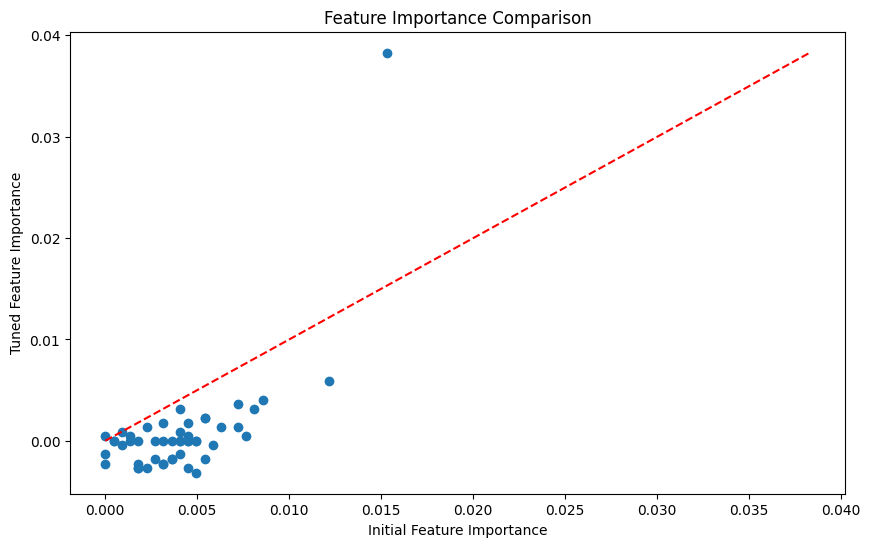

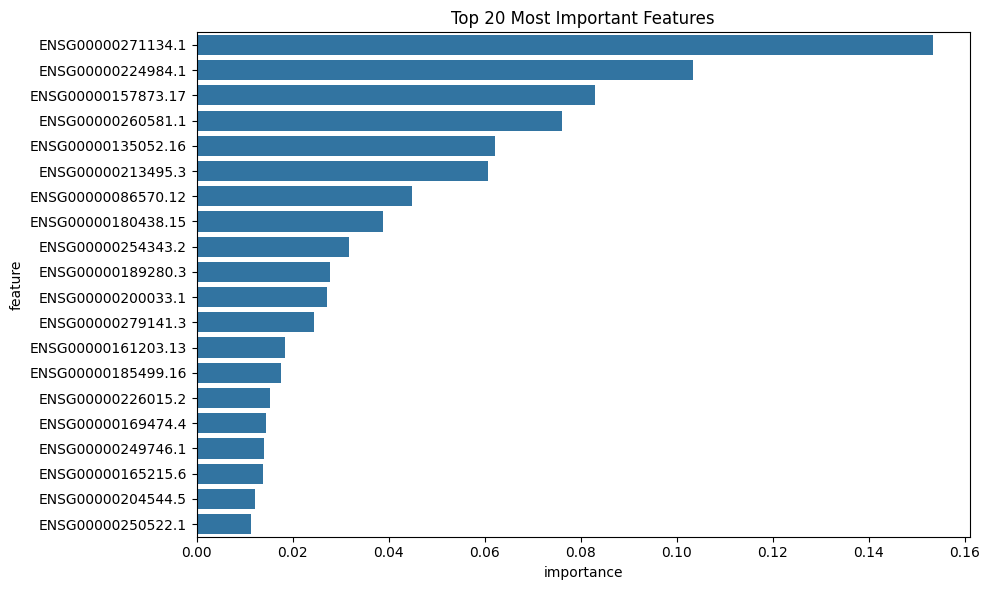

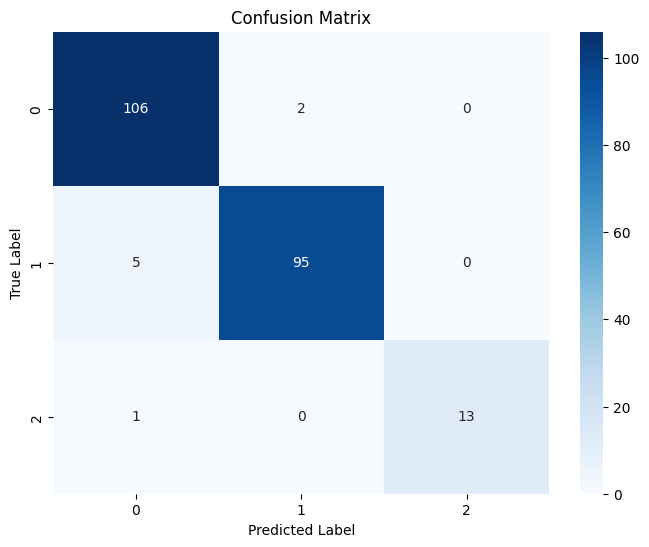

Processing feature set: ../Data/Features/NSCLC_biomarkers_de_analysis.csv
Initial model performance:
Accuracy: 0.9144
AUC-ROC: 0.9716
Cross-validation scores: 0.8805 (+/- 0.0393)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       108
           1       0.91      0.90      0.90       100
           2       1.00      1.00      1.00        14

    accuracy                           0.91       222
   macro avg       0.94      0.94      0.94       222
weighted avg       0.91      0.91      0.91       222

Best parameters found: {'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.12094474216224328, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 295}

Tuned model performance:
Accuracy: 0.9009
AUC-ROC: 0.9761
Cross-validation scores: 0.8738 (+/- 0.0377)

Classification Report:
               precision    recall  f1-score   support

           0      

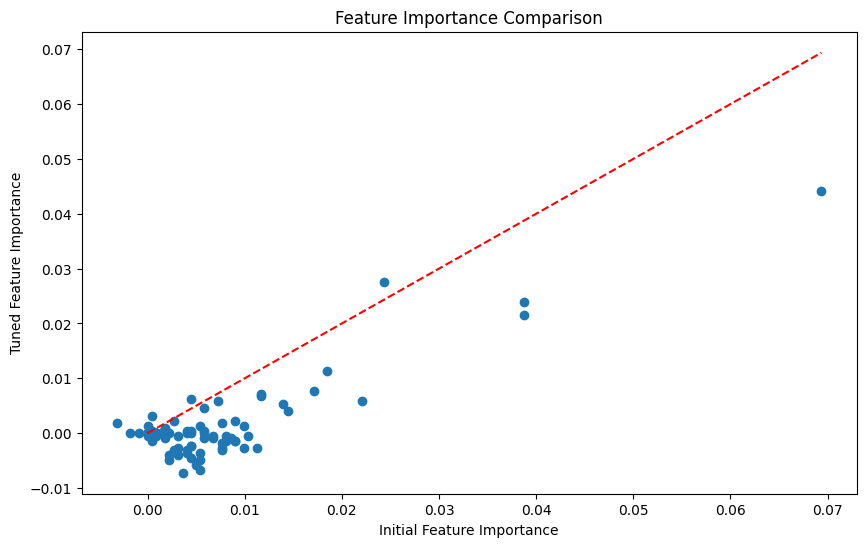

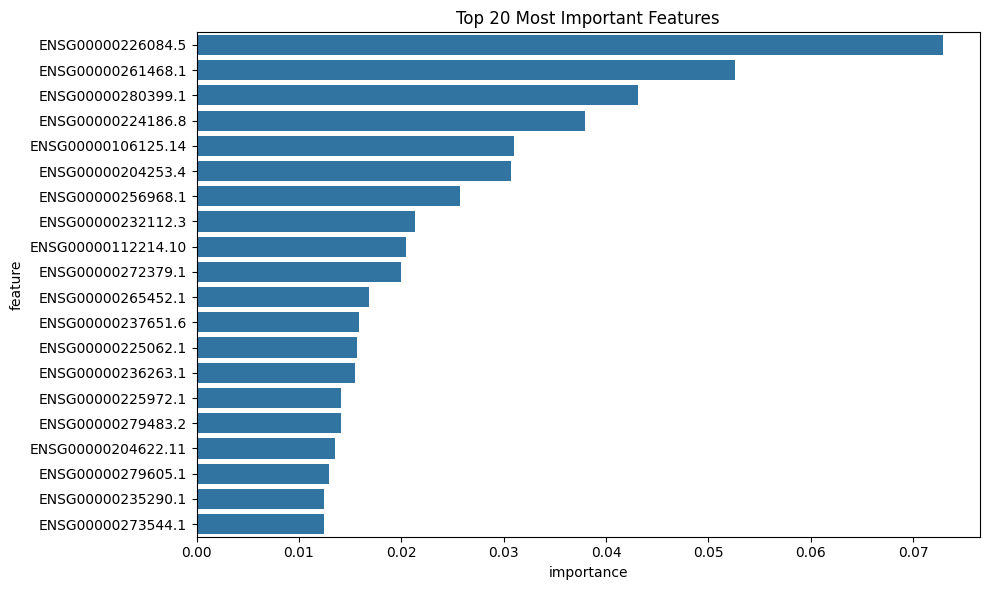

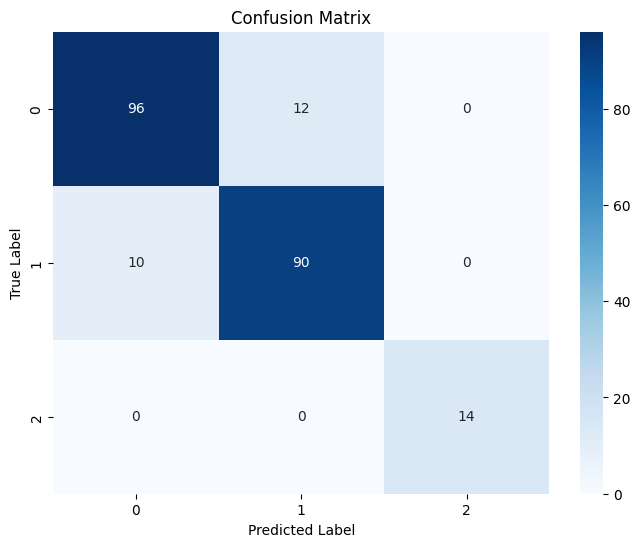

Processing feature set: ../Data/Features/NSCLC_biomarkers_50_de_analysis.csv
Initial model performance:
Accuracy: 0.8694
AUC-ROC: 0.9669
Cross-validation scores: 0.8445 (+/- 0.0567)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       108
           1       0.88      0.82      0.85       100
           2       1.00      1.00      1.00        14

    accuracy                           0.87       222
   macro avg       0.91      0.91      0.91       222
weighted avg       0.87      0.87      0.87       222

Best parameters found: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 0.23537520199317538, 'min_samples_leaf': 5, 'min_samples_split': 18, 'n_estimators': 560}

Tuned model performance:
Accuracy: 0.8604
AUC-ROC: 0.9645
Cross-validation scores: 0.8377 (+/- 0.0524)

Classification Report:
               precision    recall  f1-score   support

        

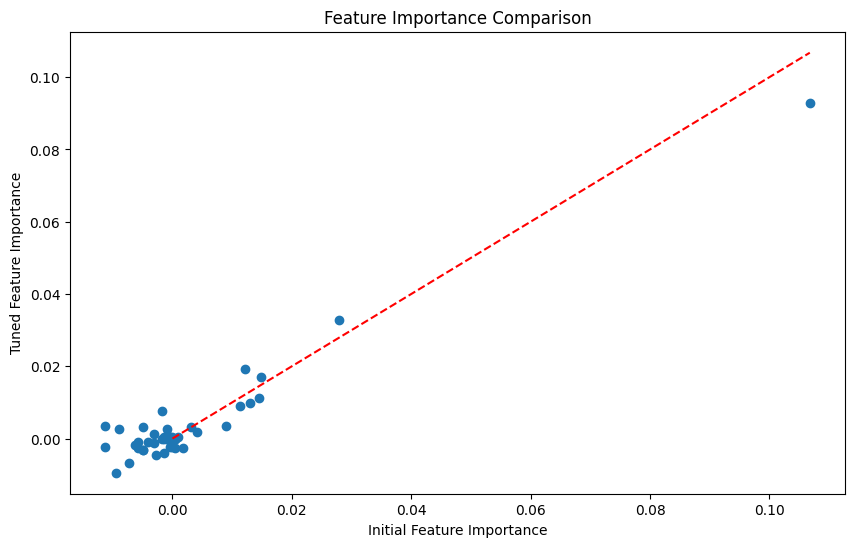

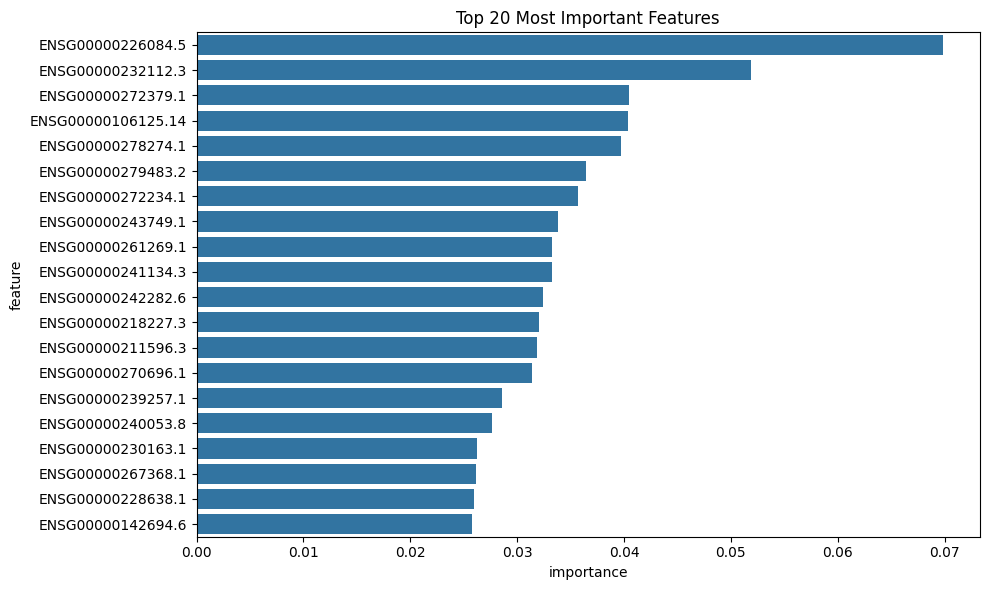

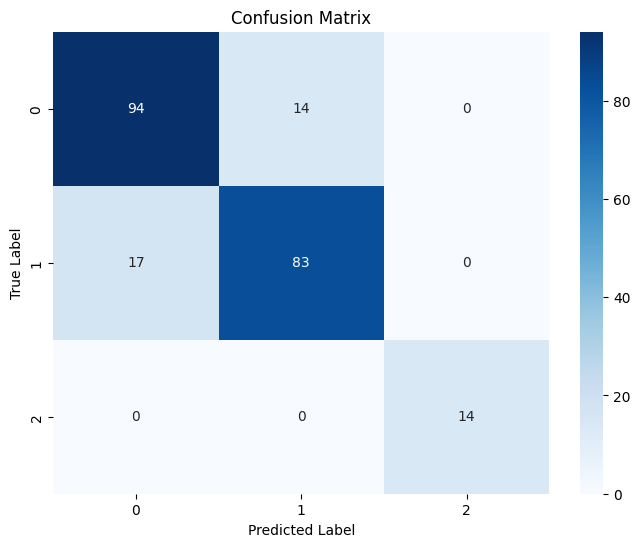

Processing feature set: ../Data/Features/RF_MI_DE_Union.csv
Initial model performance:
Accuracy: 0.8604
AUC-ROC: 0.9492
Cross-validation scores: 0.8512 (+/- 0.0623)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       108
           1       0.83      0.86      0.85       100
           2       1.00      1.00      1.00        14

    accuracy                           0.86       222
   macro avg       0.90      0.90      0.90       222
weighted avg       0.86      0.86      0.86       222

Best parameters found: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 0.14140237781957748, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 552}

Tuned model performance:
Accuracy: 0.8784
AUC-ROC: 0.9520
Cross-validation scores: 0.8422 (+/- 0.0517)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89

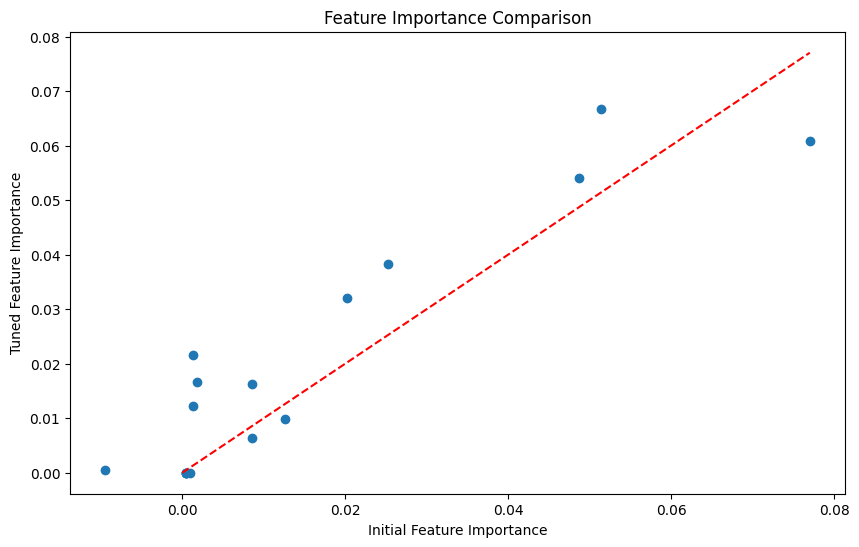

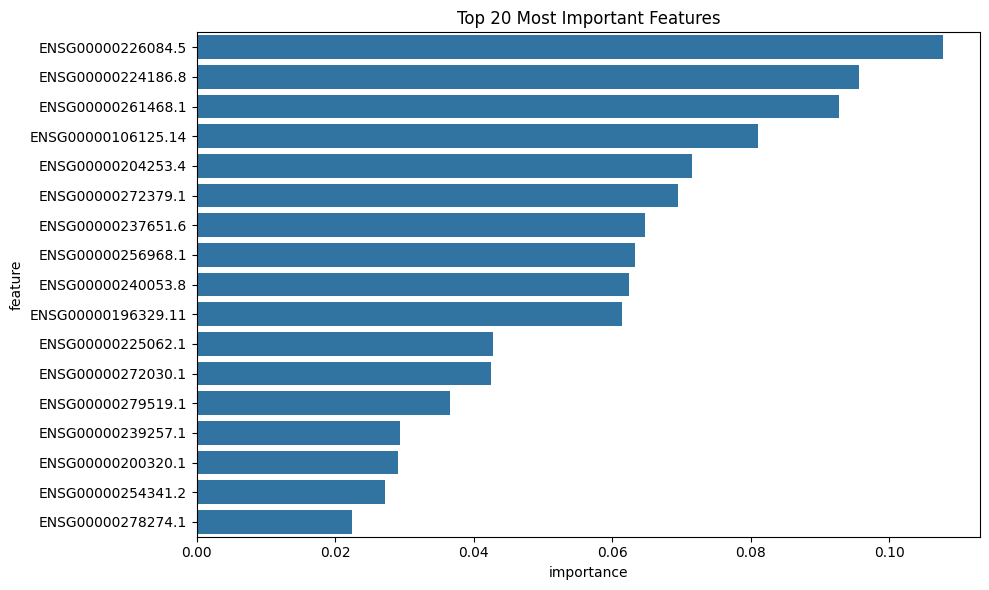

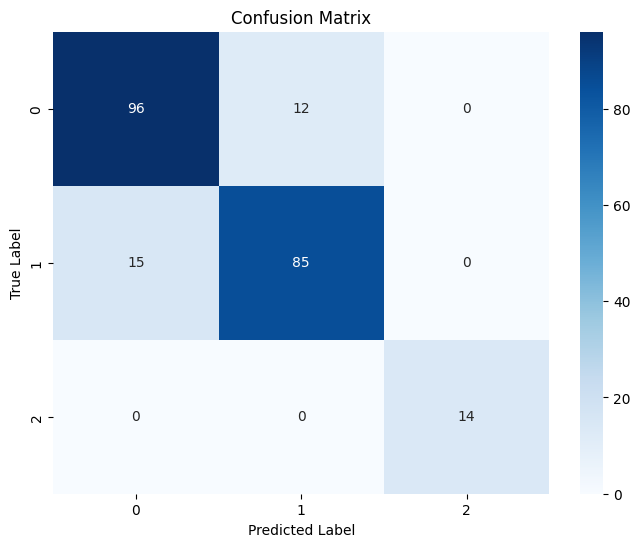

Processing feature set: ../Data/Features/MI_DE_Intersection.csv
Initial model performance:
Accuracy: 0.8423
AUC-ROC: 0.9471
Cross-validation scores: 0.8557 (+/- 0.0520)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       108
           1       0.81      0.85      0.83       100
           2       1.00      1.00      1.00        14

    accuracy                           0.84       222
   macro avg       0.89      0.89      0.89       222
weighted avg       0.84      0.84      0.84       222

Best parameters found: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 30, 'max_features': 0.7098079256580542, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 610}

Tuned model performance:
Accuracy: 0.8514
AUC-ROC: 0.9519
Cross-validation scores: 0.8501 (+/- 0.0586)

Classification Report:
               precision    recall  f1-score   support

           0   

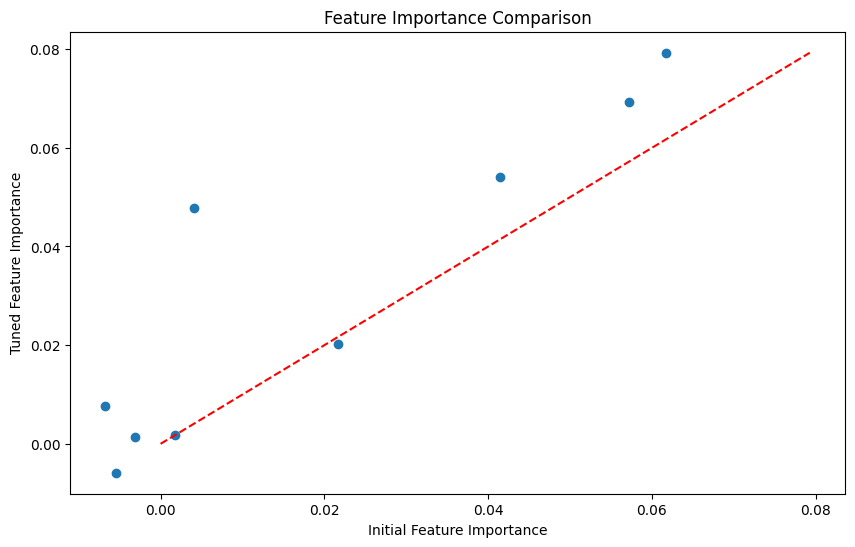

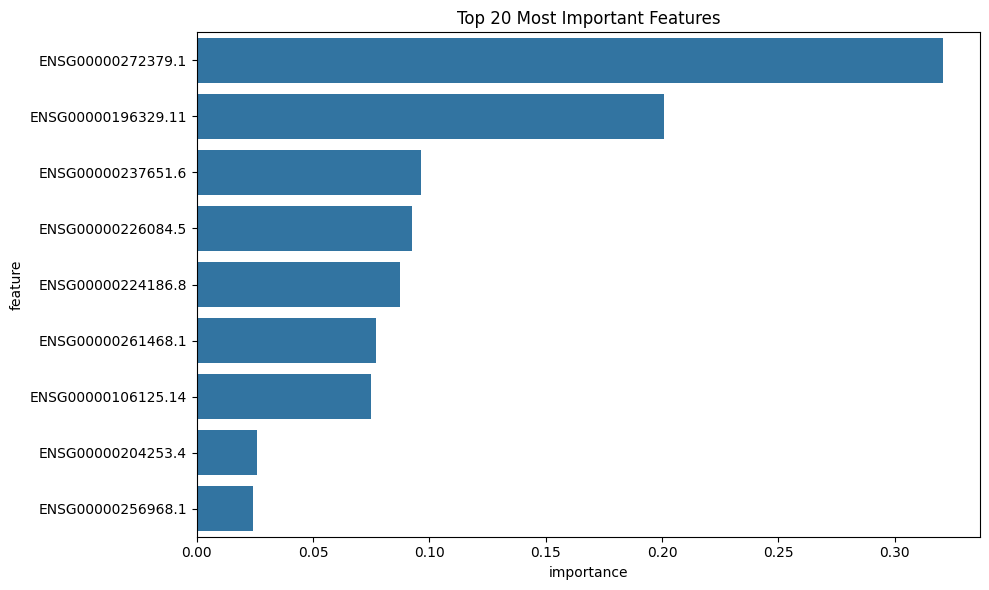

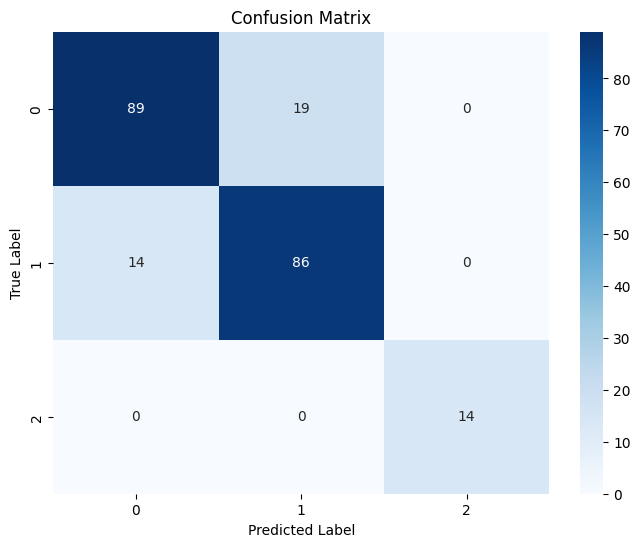

Processing feature set: ../Data/Features/RF_DE_Intersection.csv
Initial model performance:
Accuracy: 0.5586
AUC-ROC: 0.7389
Cross-validation scores: 0.5513 (+/- 0.0450)

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.56       108
           1       0.51      0.48      0.49       100
           2       1.00      1.00      1.00        14

    accuracy                           0.56       222
   macro avg       0.68      0.68      0.68       222
weighted avg       0.56      0.56      0.56       222

Best parameters found: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.13924339457899038, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 472}

Tuned model performance:
Accuracy: 0.5676
AUC-ROC: 0.7565
Cross-validation scores: 0.5930 (+/- 0.0694)

Classification Report:
               precision    recall  f1-score   support

           0 

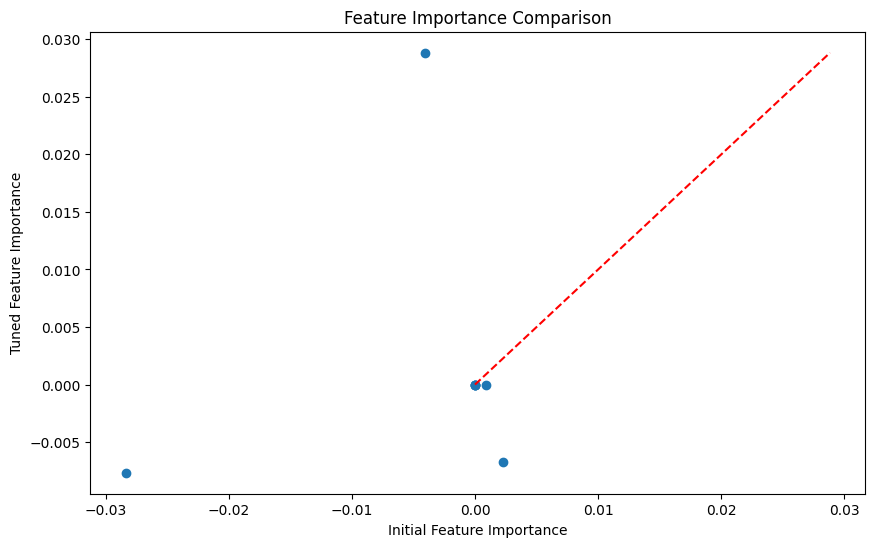

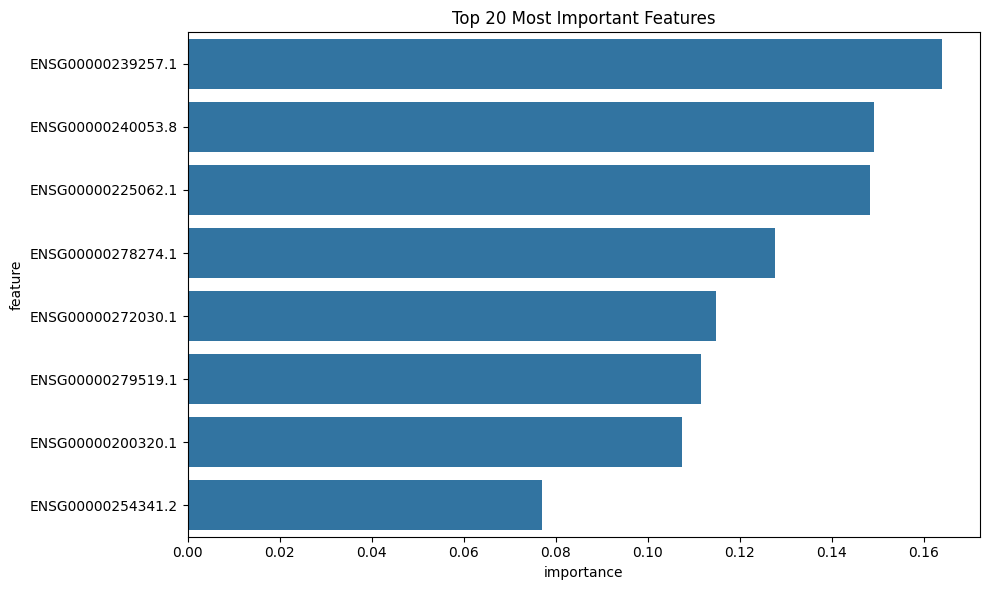

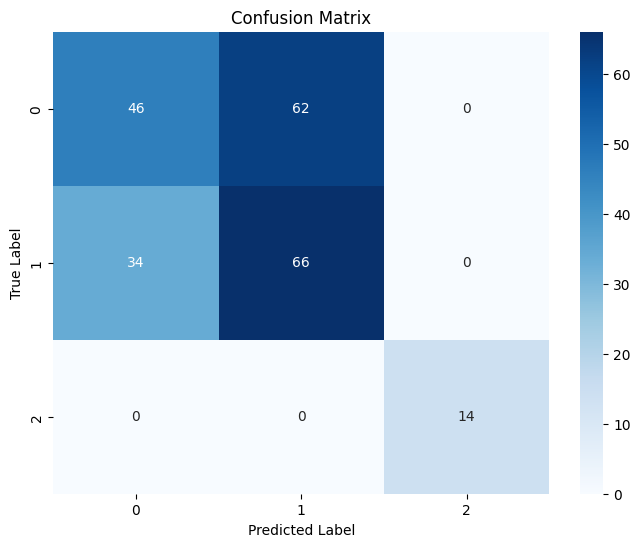

In [4]:
# Main execution
for feature_set in feature_sets:
    print(f"Processing feature set: {feature_set}")
    
    X, y = load_data(expression_path, labels_path, feature_set)
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    rf = RandomForestClassifier(random_state=42)
    rf, initial_metrics = train_and_evaluate_model(rf, X_train, X_test, y_train, y_test)
    
    print("Initial model performance:")
    print(f"Accuracy: {initial_metrics['accuracy']:.4f}")
    print(f"AUC-ROC: {initial_metrics['auc_roc']:.4f}")
    print(f"Cross-validation scores: {initial_metrics['cv_scores'].mean():.4f} (+/- {initial_metrics['cv_scores'].std() * 2:.4f})")
    print("\nClassification Report:\n", initial_metrics['classification_report'])
    
    # Hyperparameter tuning
    param_grid = {
        'n_estimators': randint(100, 1000),
        'max_depth': [5, 10, 20, 30, 40, 50, None],
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 8),
        'max_features': uniform(0.1, 0.9),
        'bootstrap': [True, False],
        'class_weight': [None, 'balanced', 'balanced_subsample'],
        'criterion': ['gini', 'entropy']
    }
    
    # Use StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    rf_random = RandomizedSearchCV(
        estimator=rf, 
        param_distributions=param_grid, 
        n_iter=100,  # Increased from 50 to 100
        cv=cv,
        verbose=0, 
        random_state=42, 
        n_jobs=-1,
        scoring=custom_scorer
    )
    
    rf_random.fit(X_train, y_train)
    
    print("Best parameters found:", rf_random.best_params_)
    
    best_rf = rf_random.best_estimator_
    best_rf, tuned_metrics = train_and_evaluate_model(best_rf, X_train, X_test, y_train, y_test)
    
    print("\nTuned model performance:")
    print(f"Accuracy: {tuned_metrics['accuracy']:.4f}")
    print(f"AUC-ROC: {tuned_metrics['auc_roc']:.4f}")
    print(f"Cross-validation scores: {tuned_metrics['cv_scores'].mean():.4f} (+/- {tuned_metrics['cv_scores'].std() * 2:.4f})")
    print("\nClassification Report:\n", tuned_metrics['classification_report'])
    
    # Compare feature importances
    initial_importance = initial_metrics['feature_importance'].importances_mean
    tuned_importance = tuned_metrics['feature_importance'].importances_mean
    
    plt.figure(figsize=(10, 6))
    plt.scatter(initial_importance, tuned_importance)
    plt.plot([0, max(initial_importance.max(), tuned_importance.max())], 
             [0, max(initial_importance.max(), tuned_importance.max())], 'r--')
    plt.xlabel('Initial Feature Importance')
    plt.ylabel('Tuned Feature Importance')
    plt.title('Feature Importance Comparison')
    plt.show()
    
    # Plot feature importance
    plot_feature_importance(best_rf, X.columns)
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, best_rf.predict(X_test))

Processing feature set: ../Data/Features/Random_Forest.csv
Initial model performance:
Accuracy: 0.9685
AUC-ROC: 0.9973
Cross-validation scores: 0.9527 (+/- 0.0253)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.97      0.96      0.96       100
           2       1.00      1.00      1.00        14

    accuracy                           0.97       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.97      0.97      0.97       222

Best parameters found: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 0.41871495074910325, 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 223}

Tuned model performance:
Accuracy: 0.9595
AUC-ROC: 0.9983
Cross-validation scores: 0.9538 (+/- 0.0231)

Classification Report:
               precision    recall  f1-score   support

           0       0.96     

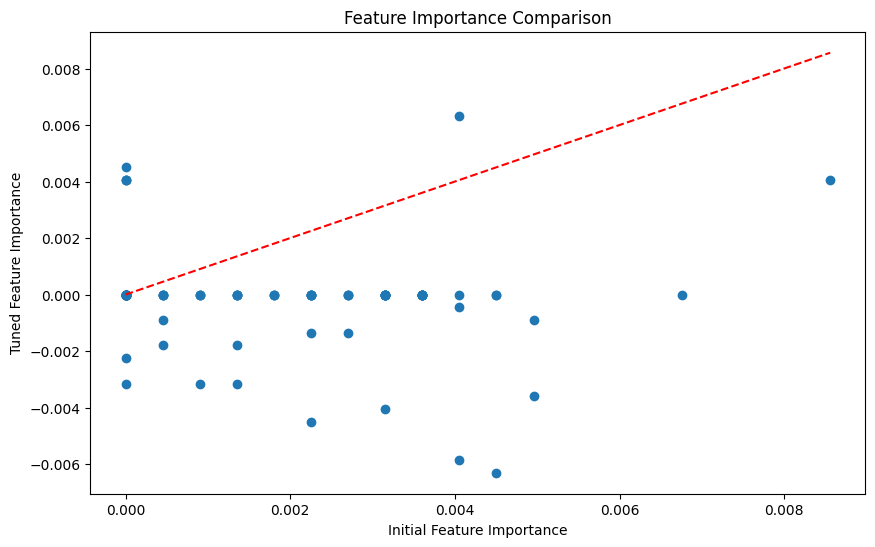

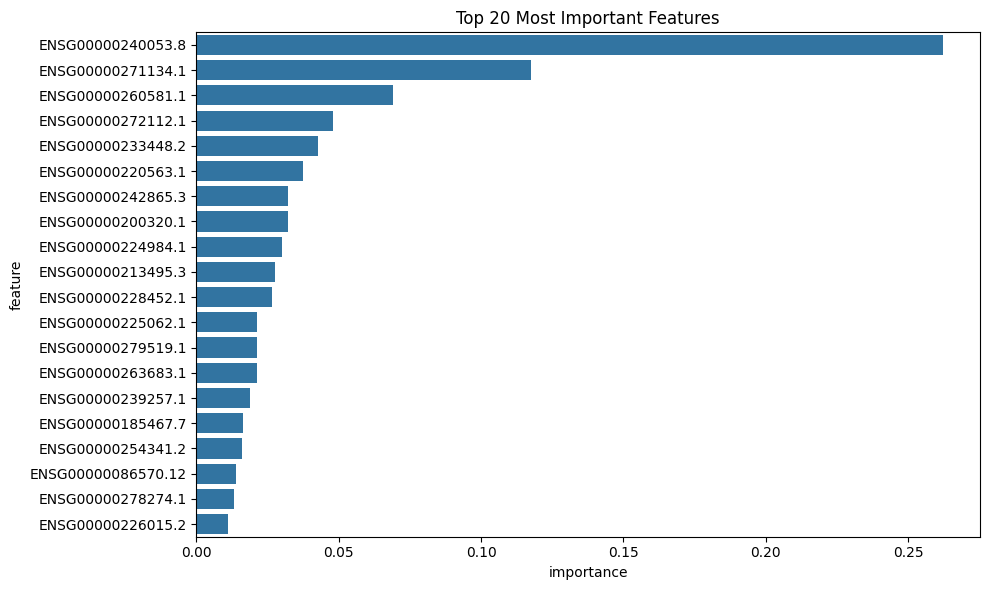

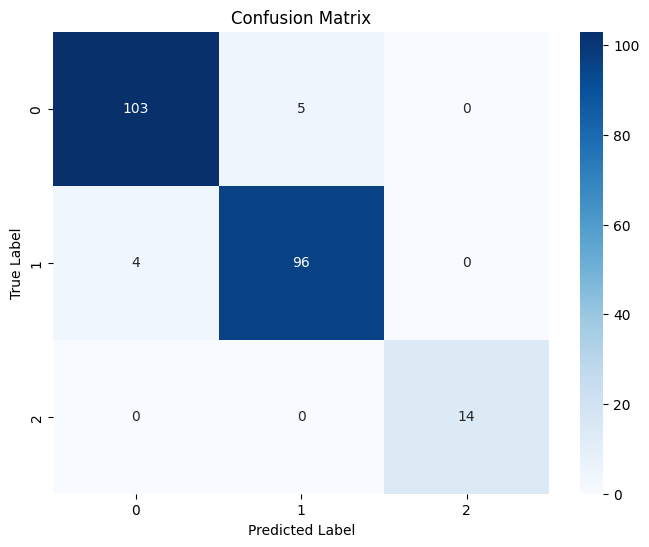

Processing feature set: ../Data/Features/RF_MI_Union.csv
Initial model performance:
Accuracy: 0.9730
AUC-ROC: 0.9974
Cross-validation scores: 0.9538 (+/- 0.0230)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.98      0.96      0.97       100
           2       1.00      1.00      1.00        14

    accuracy                           0.97       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.97      0.97      0.97       222

Best parameters found: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 0.247816842918857, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 383}

Tuned model performance:
Accuracy: 0.9730
AUC-ROC: 0.9988
Cross-validation scores: 0.9572 (+/- 0.0232)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      

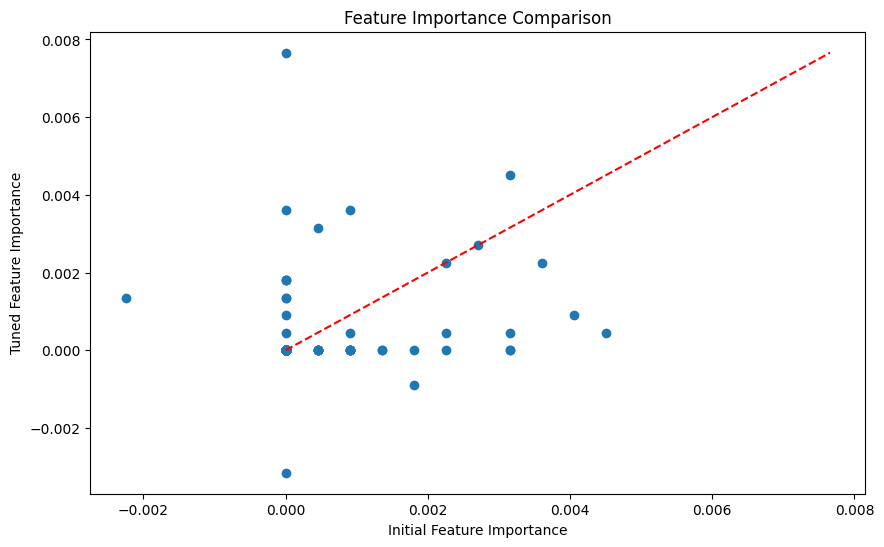

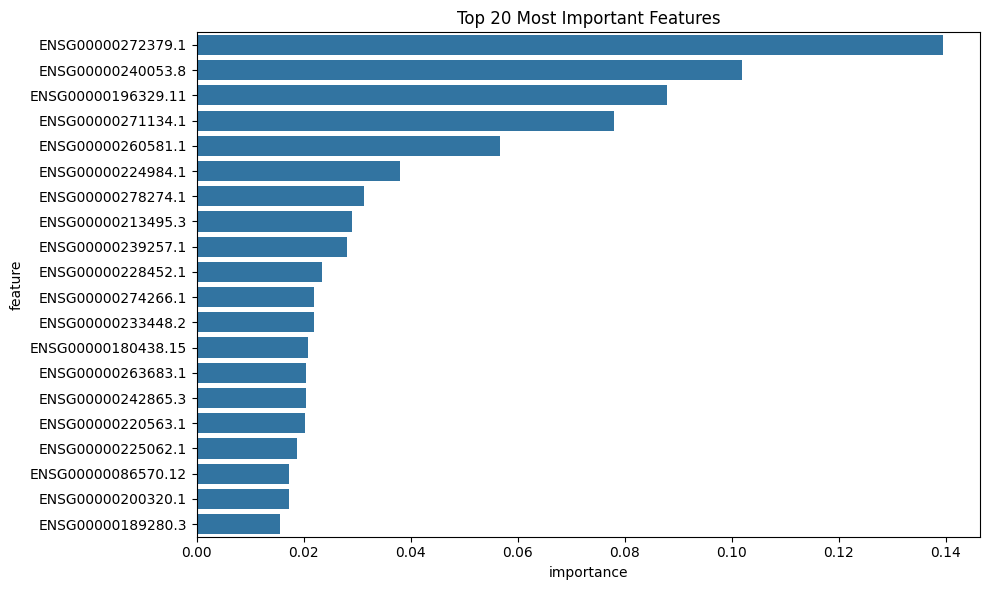

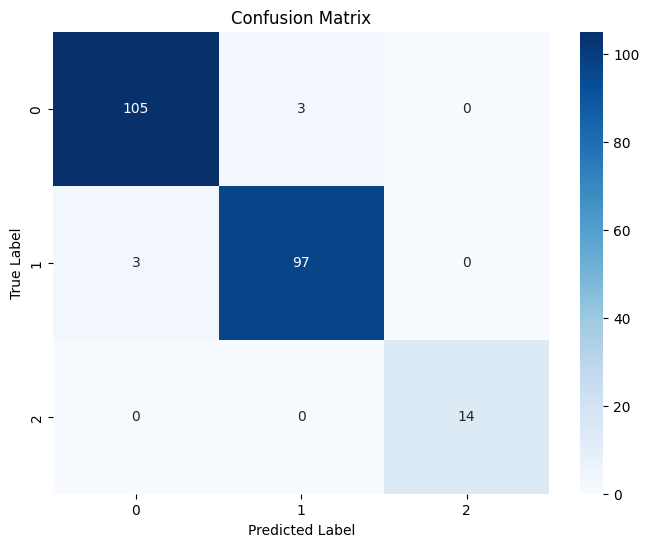

Processing feature set: ../Data/Features/RF_MI_Intersection.csv
Initial model performance:
Accuracy: 0.9730
AUC-ROC: 0.9969
Cross-validation scores: 0.9481 (+/- 0.0289)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.99      0.95      0.97       100
           2       1.00      1.00      1.00        14

    accuracy                           0.97       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.97      0.97      0.97       222

Best parameters found: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 20, 'max_features': 0.3287472841627649, 'min_samples_leaf': 2, 'min_samples_split': 18, 'n_estimators': 203}

Tuned model performance:
Accuracy: 0.9595
AUC-ROC: 0.9973
Cross-validation scores: 0.9481 (+/- 0.0289)

Classification Report:
               precision    recall  f1-score   support

           0 

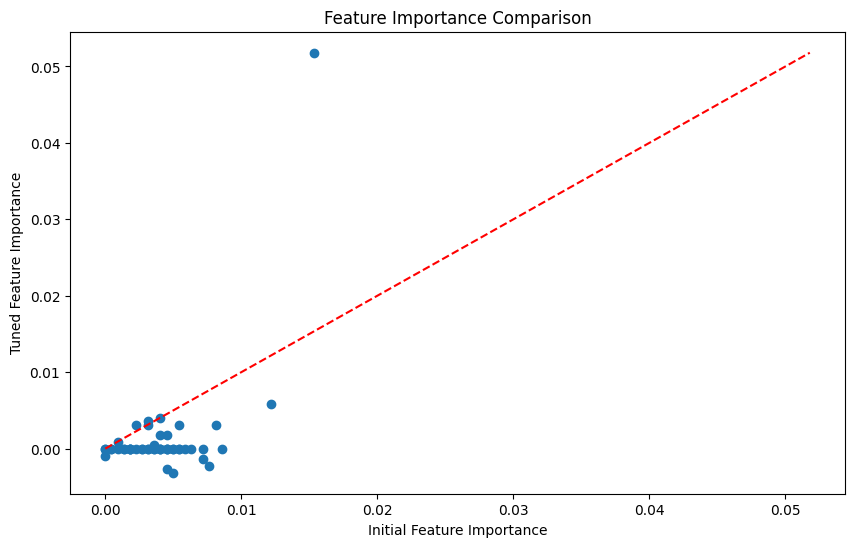

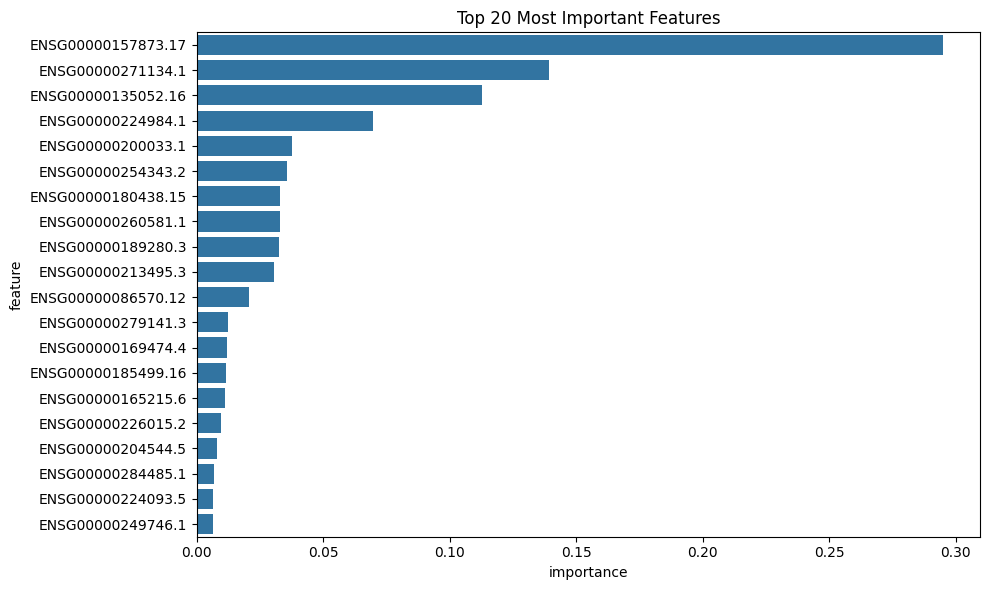

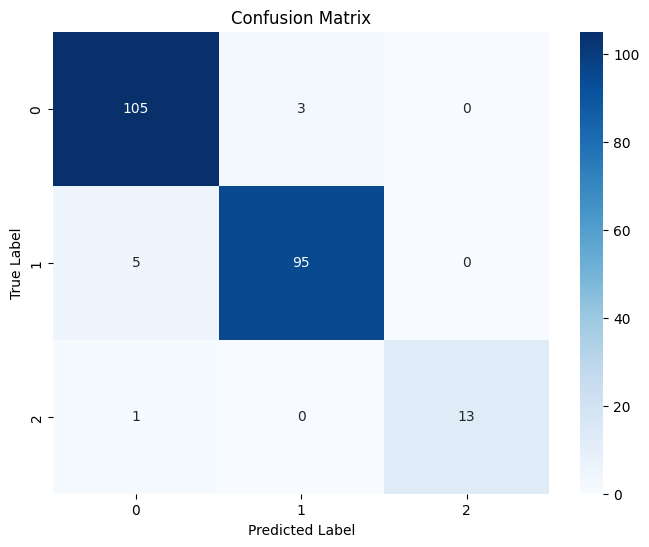

/anaconda/envs/jupyter_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/anaconda/envs/jupyter_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



Performance after feature selection:
Accuracy: 0.9595
AUC-ROC: 0.9949
Cross-validation scores: 0.9402 (+/- 0.0375)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       108
           1       0.98      0.94      0.96       100
           2       1.00      0.93      0.96        14

    accuracy                           0.96       222
   macro avg       0.97      0.95      0.96       222
weighted avg       0.96      0.96      0.96       222

Processing feature set: ../Data/Features/NSCLC_biomarkers_de_analysis.csv
Initial model performance:
Accuracy: 0.9144
AUC-ROC: 0.9716
Cross-validation scores: 0.8805 (+/- 0.0393)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       108
           1       0.91      0.90      0.90       100
           2       1.00      1.00      1.00        14

    accuracy                           0.91       222
  

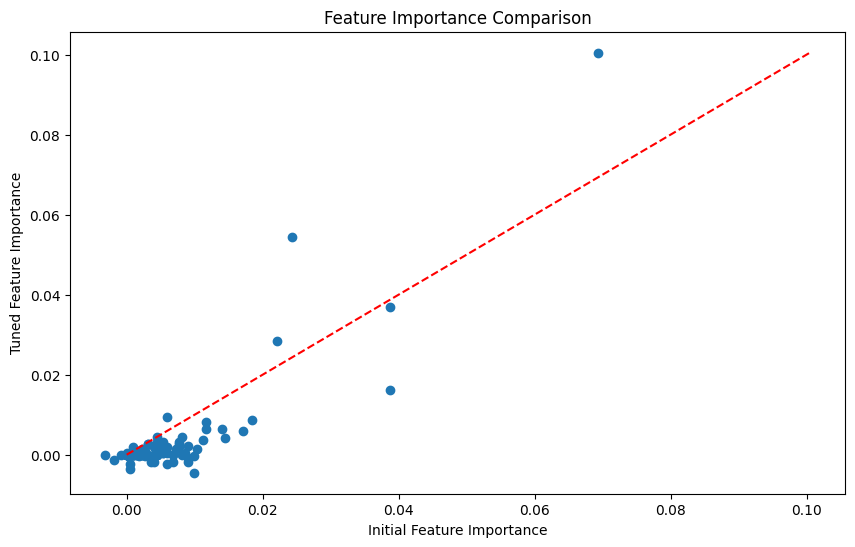

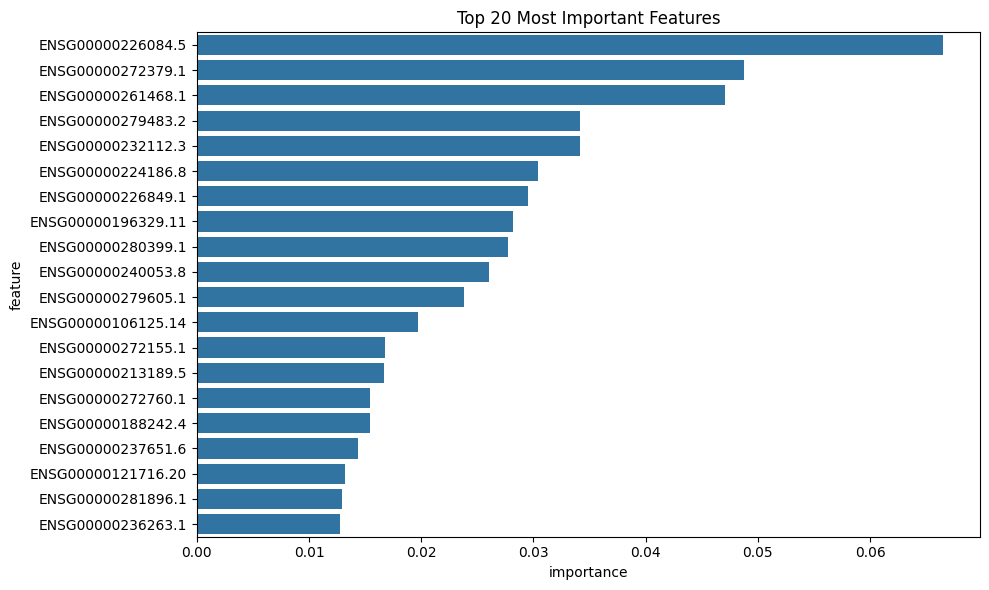

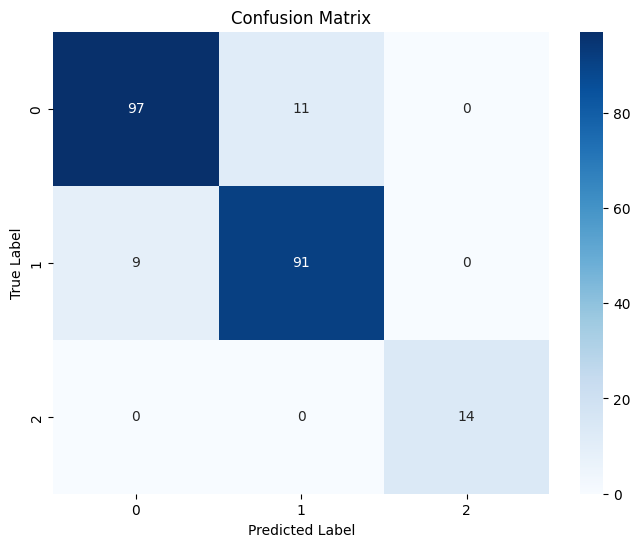

/anaconda/envs/jupyter_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/anaconda/envs/jupyter_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



Performance after feature selection:
Accuracy: 0.8964
AUC-ROC: 0.9661
Cross-validation scores: 0.8625 (+/- 0.0483)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       108
           1       0.87      0.90      0.89       100
           2       1.00      1.00      1.00        14

    accuracy                           0.90       222
   macro avg       0.93      0.93      0.93       222
weighted avg       0.90      0.90      0.90       222

Processing feature set: ../Data/Features/NSCLC_biomarkers_50_de_analysis.csv
Initial model performance:
Accuracy: 0.8694
AUC-ROC: 0.9669
Cross-validation scores: 0.8445 (+/- 0.0567)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       108
           1       0.88      0.82      0.85       100
           2       1.00      1.00      1.00        14

    accuracy                           0.87       222

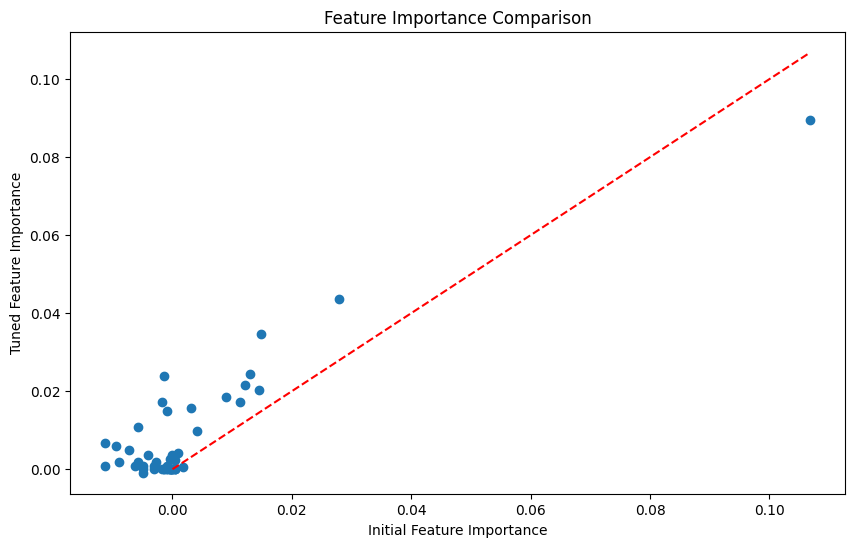

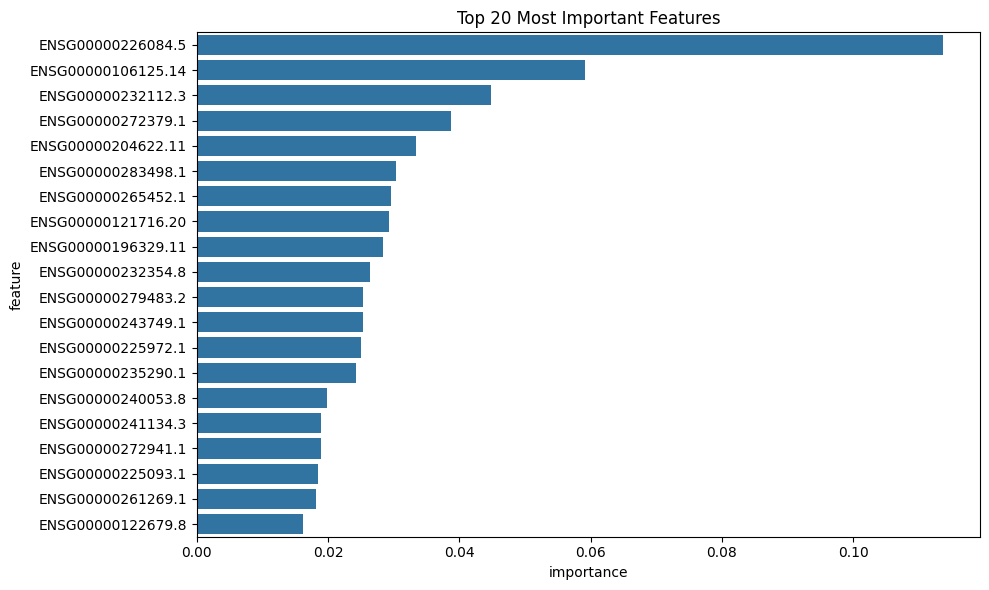

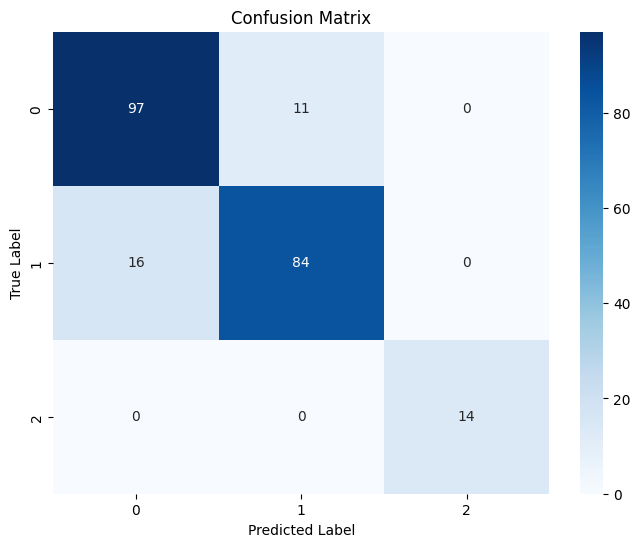

/anaconda/envs/jupyter_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/anaconda/envs/jupyter_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



Performance after feature selection:
Accuracy: 0.8559
AUC-ROC: 0.9655
Cross-validation scores: 0.8410 (+/- 0.0327)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       108
           1       0.82      0.87      0.84       100
           2       1.00      1.00      1.00        14

    accuracy                           0.86       222
   macro avg       0.90      0.90      0.90       222
weighted avg       0.86      0.86      0.86       222

Processing feature set: ../Data/Features/RF_MI_DE_Union.csv
Initial model performance:
Accuracy: 0.8604
AUC-ROC: 0.9492
Cross-validation scores: 0.8512 (+/- 0.0623)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       108
           1       0.83      0.86      0.85       100
           2       1.00      1.00      1.00        14

    accuracy                           0.86       222
   macro avg    

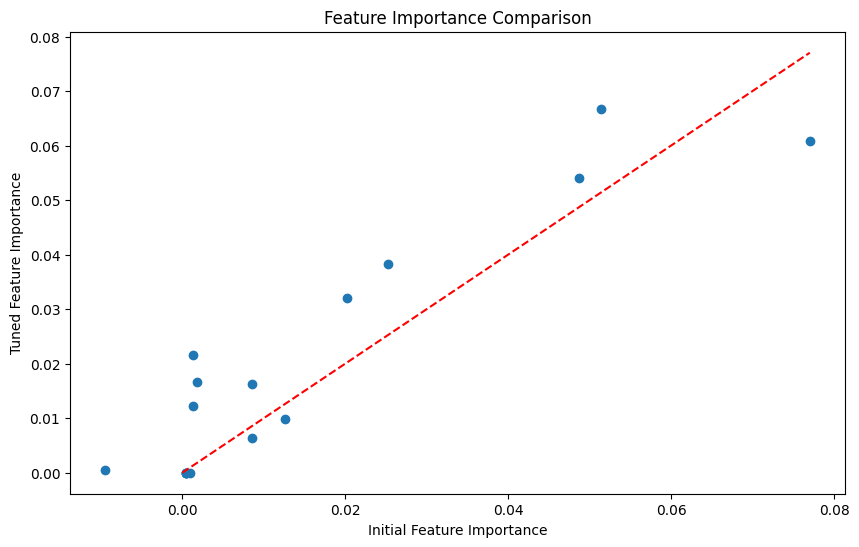

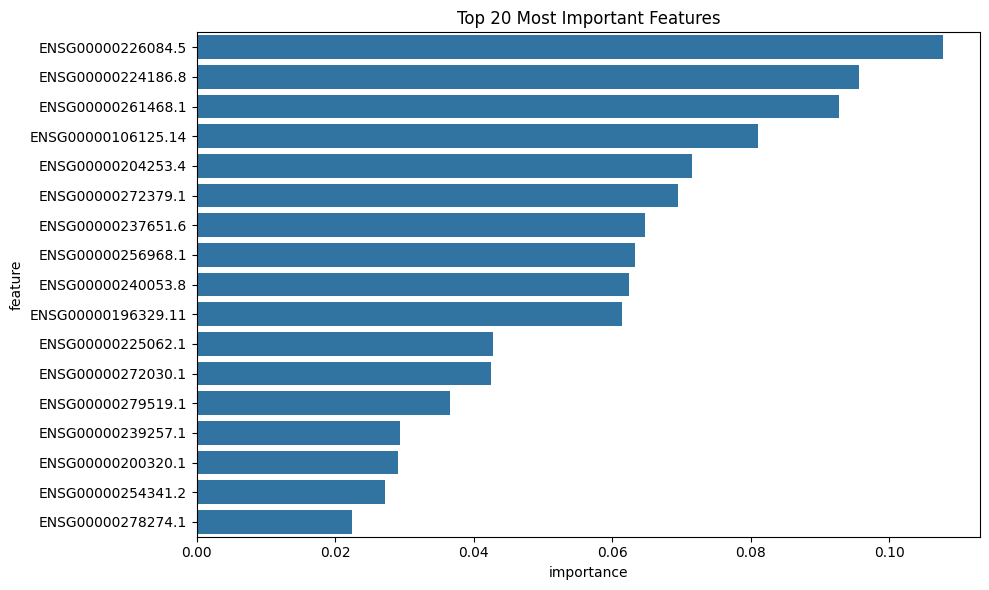

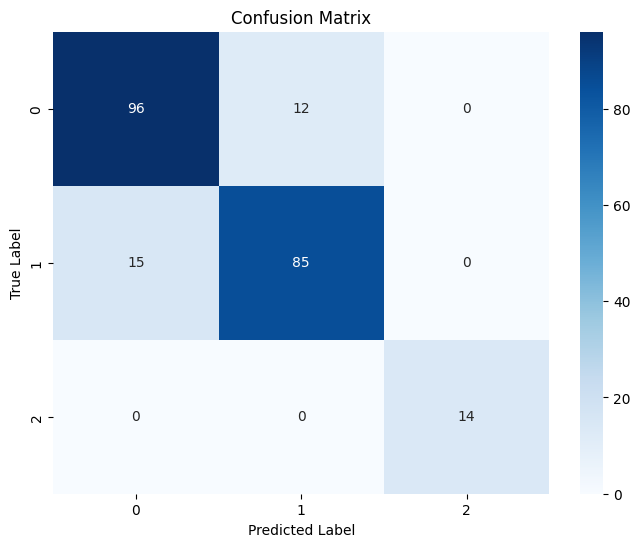

/anaconda/envs/jupyter_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/anaconda/envs/jupyter_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



Performance after feature selection:
Accuracy: 0.8784
AUC-ROC: 0.9528
Cross-validation scores: 0.8478 (+/- 0.0441)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       108
           1       0.87      0.86      0.86       100
           2       1.00      1.00      1.00        14

    accuracy                           0.88       222
   macro avg       0.91      0.91      0.91       222
weighted avg       0.88      0.88      0.88       222

Processing feature set: ../Data/Features/MI_DE_Intersection.csv
Initial model performance:
Accuracy: 0.8423
AUC-ROC: 0.9471
Cross-validation scores: 0.8557 (+/- 0.0520)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       108
           1       0.81      0.85      0.83       100
           2       1.00      1.00      1.00        14

    accuracy                           0.84       222
   macro avg

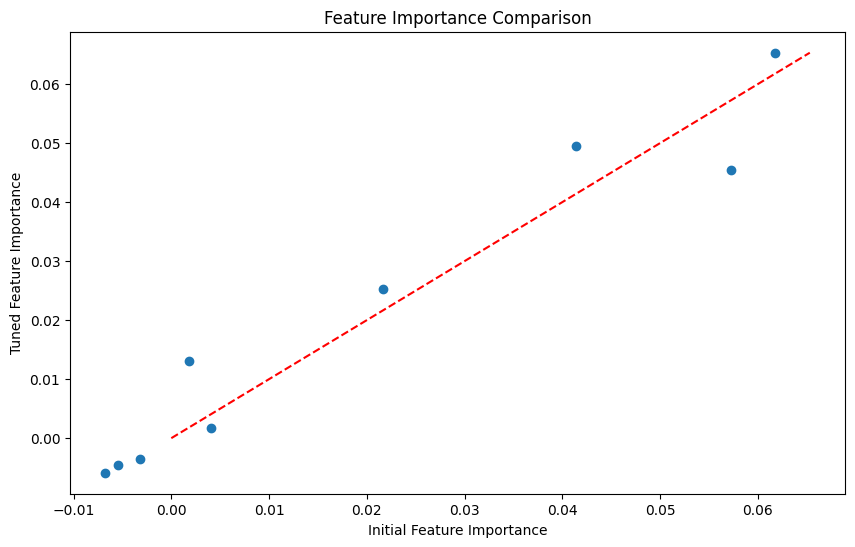

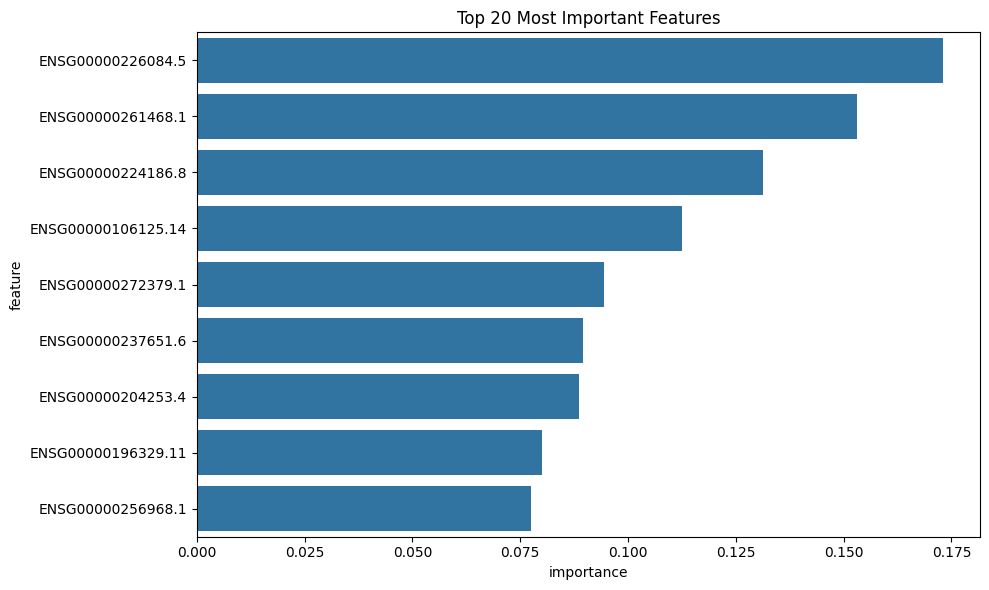

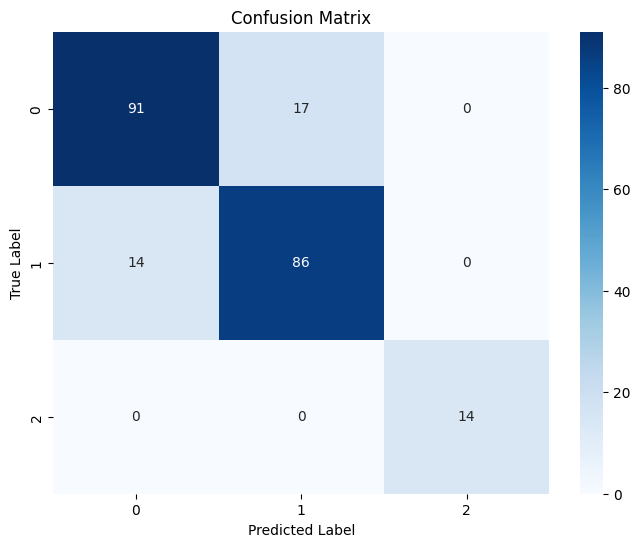

/anaconda/envs/jupyter_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/anaconda/envs/jupyter_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



Performance after feature selection:
Accuracy: 0.8559
AUC-ROC: 0.9472
Cross-validation scores: 0.8388 (+/- 0.0398)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       108
           1       0.83      0.86      0.84       100
           2       1.00      1.00      1.00        14

    accuracy                           0.86       222
   macro avg       0.90      0.90      0.90       222
weighted avg       0.86      0.86      0.86       222

Processing feature set: ../Data/Features/RF_DE_Intersection.csv
Initial model performance:
Accuracy: 0.5586
AUC-ROC: 0.7389
Cross-validation scores: 0.5513 (+/- 0.0450)

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.56       108
           1       0.51      0.48      0.49       100
           2       1.00      1.00      1.00        14

    accuracy                           0.56       222
   macro avg

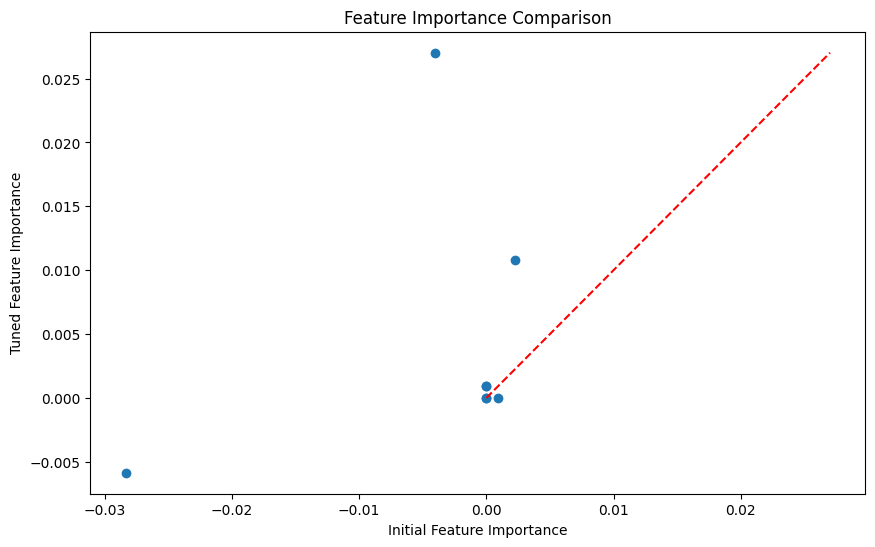

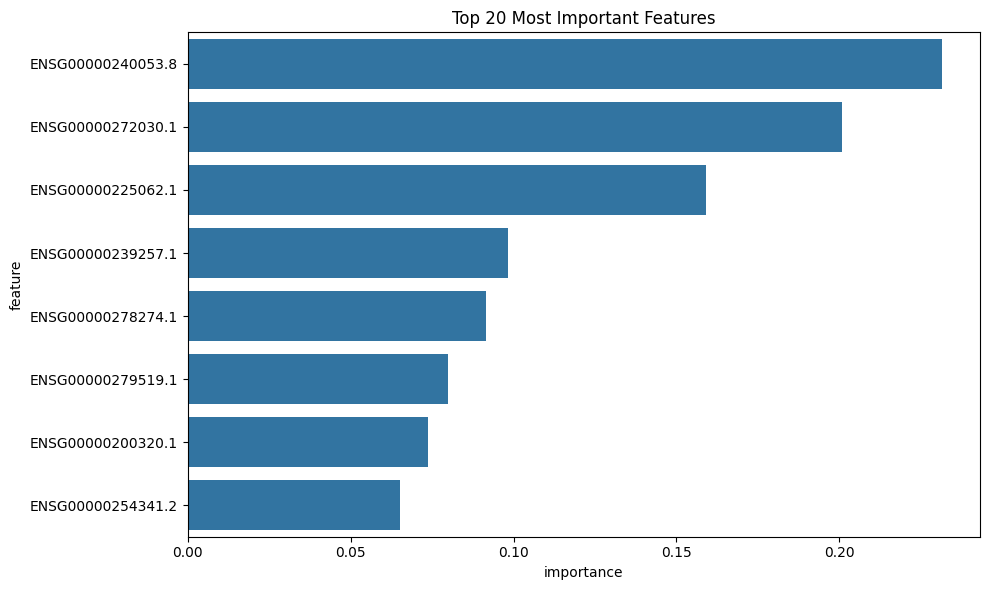

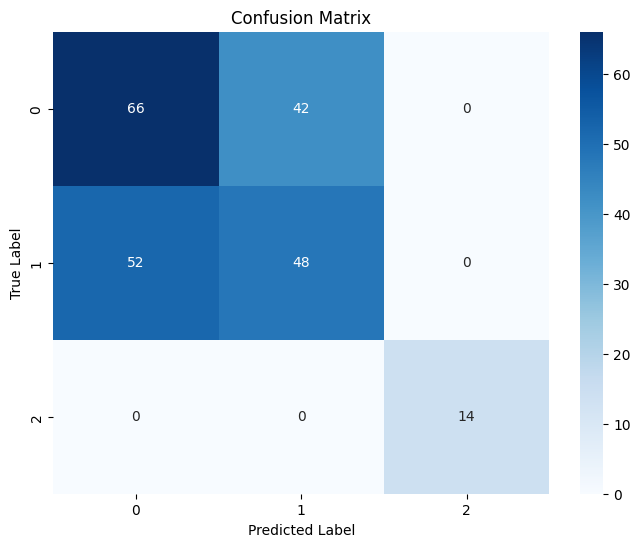

/anaconda/envs/jupyter_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/anaconda/envs/jupyter_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



Performance after feature selection:
Accuracy: 0.5766
AUC-ROC: 0.7548
Cross-validation scores: 0.5773 (+/- 0.0498)

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.61      0.58       108
           1       0.53      0.48      0.51       100
           2       1.00      1.00      1.00        14

    accuracy                           0.58       222
   macro avg       0.70      0.70      0.70       222
weighted avg       0.58      0.58      0.57       222



In [4]:
# Main execution
for idx, feature_set in enumerate(feature_sets):
    print(f"Processing feature set: {feature_set}")
    
    X, y = load_data(expression_path, labels_path, feature_set)
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Initialize RandomForestClassifier with default parameters
    rf = RandomForestClassifier(random_state=42)
    rf, initial_metrics = train_and_evaluate_model(rf, X_train, X_test, y_train, y_test)
    
    print("Initial model performance:")
    print(f"Accuracy: {initial_metrics['accuracy']:.4f}")
    print(f"AUC-ROC: {initial_metrics['auc_roc']:.4f}")
    print(f"Cross-validation scores: {initial_metrics['cv_scores'].mean():.4f} (+/- {initial_metrics['cv_scores'].std() * 2:.4f})")
    print("\nClassification Report:\n", initial_metrics['classification_report'])
    
    # Hyperparameter tuning
    if idx < 2:  # For the first two feature sets (Random_Forest.csv and RF_MI_Union.csv)
        # More conservative hyperparameter ranges to mitigate overfitting
        param_grid = {
            'n_estimators': randint(100, 500),
            'max_depth': [5, 10, 15, 20, None],
            'min_samples_split': randint(5, 15),
            'min_samples_leaf': randint(2, 8),
            'max_features': uniform(0.1, 0.5),
            'bootstrap': [True, False],
            'class_weight': [None, 'balanced'],
            'criterion': ['gini', 'entropy']
        }
    else:  # For the other feature sets
        # Broader hyperparameter ranges to potentially improve performance
        param_grid = {
            'n_estimators': randint(100, 1000),
            'max_depth': [10, 20, 30, 40, 50, None],
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10),
            'max_features': uniform(0.1, 0.9),
            'bootstrap': [True, False],
            'class_weight': [None, 'balanced', 'balanced_subsample'],
            'criterion': ['gini', 'entropy']
        }
    
    # Use StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    rf_random = RandomizedSearchCV(
        estimator=rf, 
        param_distributions=param_grid, 
        n_iter=100,
        cv=cv,
        verbose=0, 
        random_state=42, 
        n_jobs=-1,
        scoring=custom_scorer
    )
    
    rf_random.fit(X_train, y_train)
    
    print("Best parameters found:", rf_random.best_params_)
    
    best_rf = rf_random.best_estimator_
    best_rf, tuned_metrics = train_and_evaluate_model(best_rf, X_train, X_test, y_train, y_test)
    
    print("\nTuned model performance:")
    print(f"Accuracy: {tuned_metrics['accuracy']:.4f}")
    print(f"AUC-ROC: {tuned_metrics['auc_roc']:.4f}")
    print(f"Cross-validation scores: {tuned_metrics['cv_scores'].mean():.4f} (+/- {tuned_metrics['cv_scores'].std() * 2:.4f})")
    print("\nClassification Report:\n", tuned_metrics['classification_report'])
    
    # Compare feature importances
    initial_importance = initial_metrics['feature_importance'].importances_mean
    tuned_importance = tuned_metrics['feature_importance'].importances_mean
    
    plt.figure(figsize=(10, 6))
    plt.scatter(initial_importance, tuned_importance)
    plt.plot([0, max(initial_importance.max(), tuned_importance.max())], 
             [0, max(initial_importance.max(), tuned_importance.max())], 'r--')
    plt.xlabel('Initial Feature Importance')
    plt.ylabel('Tuned Feature Importance')
    plt.title('Feature Importance Comparison')
    plt.show()
    
    # Plot feature importance
    plot_feature_importance(best_rf, X.columns)
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, best_rf.predict(X_test))
    
    # For the other feature sets, apply feature selection
    if idx >= 2:
        # Use SelectFromModel for feature selection
        selector = SelectFromModel(best_rf, prefit=True)
        X_train_selected = selector.transform(X_train)
        X_test_selected = selector.transform(X_test)
        
        # Train a new model on selected features
        rf_selected = RandomForestClassifier(**best_rf.get_params())
        rf_selected.fit(X_train_selected, y_train)
        
        _, selected_metrics = train_and_evaluate_model(rf_selected, X_train_selected, X_test_selected, y_train, y_test)
        
        print("\nPerformance after feature selection:")
        print(f"Accuracy: {selected_metrics['accuracy']:.4f}")
        print(f"AUC-ROC: {selected_metrics['auc_roc']:.4f}")
        print(f"Cross-validation scores: {selected_metrics['cv_scores'].mean():.4f} (+/- {selected_metrics['cv_scores'].std() * 2:.4f})")
        print("\nClassification Report:\n", selected_metrics['classification_report'])